# Tests of "reduced" or "approximated" CO5BOLD-data

- arief_st28gm06n052_ellipsoids/filled-mean-ellipsoids_st28gm06n052-032.pickle

Ellipsoids with only average data throughout

- arief_st28gm06n052_ellipsoids/filled-radialdistribution-ellipsoids_st28gm06n052-032.pickle

Ellipsoids with 1/r^2 dependant 

## My method:

- Load R3D-grid-file (csv with R, X, Y, Z coords of all R3D-cells)

- Create an empty list corresponding to e.g. dust_density.inp

- Loop through each ellipsoid's cell coordinates

- Compare with R3D-coordinates

- Save densities at appropiate positions in the dust_density.inp-list





In [ ]:
#I have now uploaded two pickle files on the phy-exwings server, located in: 
# /home/ariah/dat/caucus (sidenote: caucus stands for ChAracterising dUst CloUdS hahaha):

#    filled-mean-ellipsoids_st28gm06n052-032.pickle – ellipsoids filled in with 
#    mean values (i.e. uniform distribution)
#    filled-radialdistribution-ellipsoids_st28gm06n052-032.pickle – ellipsoids 
#    filled in with an inverse radial distribution (e.g. gas density higher 
#    further away from the star)

 
# These are for the snapshot 032 of the model st28gm06n052. I restructured the data 
# format following your suggestion yesterday, about separating each ellipsoids into
# different arrays rather than having one big [679^3] domain – which saved a lot of
# space! Now the data is mostly in a list of arrays. You can load the pickle files
# as follows:

###
#
#import pickle
#
#with open('[INSERTDIRECTORY]/filled-mean-ellipsoids_lists.pickle', 'rb') as handle:
#    b = pickle.load(handle)
#
###

# where you would have loaded a dictionary with the keys:

#    'centre_ellipsoid' (2D array): indices of the centre of the ellipsoids [X,Y,Z]
#    'distance_centre_grid' (1D array): distance from of the centre of the ellipsoids 
#       to the star (in cm)
#    'coord_list' (list of arrays): each element in the list is an array of the 
#       relevant indices for the eliipsoids
#    'coord_d_list' (list of arrays): each element in the list is an array of the 
#       distances from the star [X,Y,Z] (in cm)
#    'filled_rho' (list of arrays): each element in the list is an array for the 
#       values of the gas density in each coordinate
#    'filled_temp' (list of arrays): each element in the list is an array for the
#       values of the temperature in each coordinate
#    'filled_quc' (list of arrays): each element in the list is an array for the
#       values of the condensation fraction in each coordinate
#    'filled_nmonomer’ (list of arrays): each element in the list is an array for 
#       the values of the number of monomers in each coordinate

 
# There are a total of 22 ellipsoids in this snapshot. If you would like the data
# above in the format of the whole [679^3] domain, I have a small function which
# can do this -- please refer to function attached. If things are confusing then
# please let me know, we can look through the data together sometime today or
# whenever you get to this! Thank you :- )

# Important
#    `filled_nmonomer’ should be the total number of monomers, per grain; per cell
#    `filled_quc’ is actually just the monomer number density (cm-3); per cell




In [2]:
# Load
import pickle
import numpy as np
import matplotlib.pyplot as plt
AUcm = 1.49598e13 # AU in cm cm


#path = '../../exwings_archivedata/co5bold_data/st28gm06n052_arief_tests/filled-mean-ellipsoids_st28gm06n052-032.pickle'
path = '../../exwings_archivedata/co5bold_data/st28gm06n052_arief_tests/filled-radialdistribution-ellipsoids_st28gm06n052-032.pickle'

with open(path, 'rb') as f:
    ellipsoid_dict = pickle.load(f)

# Quick plots here
# Translate to r3d-inp-files





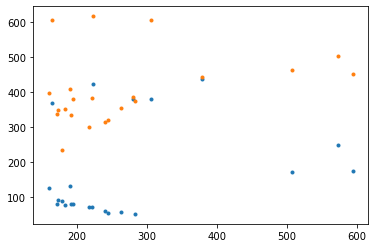

In [7]:
# Quick check of coordinates of centre of ellipsoids

print(ellipsoid_dict['centre_ellipsoid'])

# X and Y
plt.plot(
    ellipsoid_dict['centre_ellipsoid'][:,0],
    ellipsoid_dict['centre_ellipsoid'][:,1],
    '.'
)

# X and Z
plt.plot(
    ellipsoid_dict['centre_ellipsoid'][:,0],
    ellipsoid_dict['centre_ellipsoid'][:,2],
    '.'
)



In [9]:
#    'distance_centre_grid' (1D array): distance from of the centre of the ellipsoids 
#       to the star (in cm)
cloud_r_au = ellipsoid_dict['distance_centre_grid']/AUcm


array([3.77323325, 8.05164903, 8.98206196, 8.84119063, 9.33045007,
       8.23908622, 8.11251765, 8.13898043, 7.690482  , 6.92586774,
       8.82885578, 7.4305455 , 8.46003786, 8.61583901, 7.78322494,
       7.40704681, 8.17899951, 9.1437802 , 7.93717229, 8.198699  ,
       2.25307802, 6.89328836])

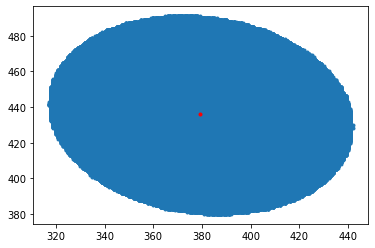

In [15]:
#    'coord_list' (list of arrays): each element in the list is an array of the 
#       relevant indices for the eliipsoids

# Plot XY-cell numbers in 
plt.plot(
    ellipsoid_dict['coord_list'][0][:,0],
    ellipsoid_dict['coord_list'][0][:,1],
    '.'
)

# And a red dot for centre cell
plt.plot(
    ellipsoid_dict['centre_ellipsoid'][0,0],
    ellipsoid_dict['centre_ellipsoid'][0,1],
    'r.'
)



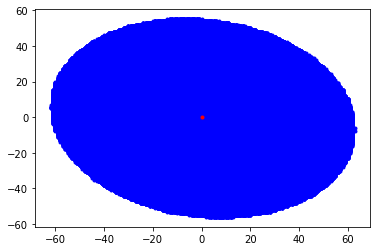

In [29]:
# Plot XY-cell numbers renomalised to zero? in 
plt.plot(
    ellipsoid_dict['coord_list'][0][:,0] - ellipsoid_dict['centre_ellipsoid'][0,0],
    ellipsoid_dict['coord_list'][0][:,1] - ellipsoid_dict['centre_ellipsoid'][0,1],
    'b.'
)

# And a red dot for centre cell
plt.plot(0,0,'r.'
)


(561184, 3)


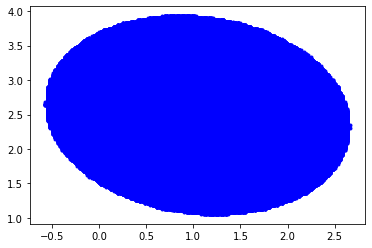

In [91]:
#    'coord_d_list' (list of arrays): each element in the list is an array of the 
#       distances from the star [X,Y,Z] (in cm)


cloud01_coords = ellipsoid_dict['coord_d_list'][0]/AUcm

# Plot cloud 0's x-y coords in AU
plt.plot(
    cloud01_coords[:,0],
    cloud01_coords[:,1],
    'b.'
)
print(cloud01_coords.shape)

(561184,)
(234647,)
(81480,)
(53787,)
(13482,)
(5918,)
(6064,)
(4172,)
(2289,)
(5646,)
(2026,)
(914,)
(1318,)
(456,)
(1121,)
(98,)
(116,)
(187,)
(282,)
(132,)
(251,)
(109,)


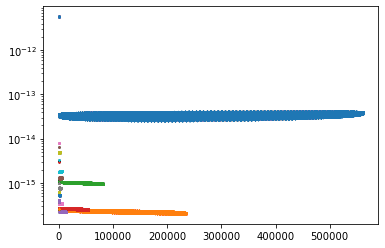

In [7]:
#    'filled_rho' (list of arrays): each element in the list is an array for the 
#       values of the gas density in each coordinate
for ncloud in range(22):
    plt.plot(ellipsoid_dict['filled_rho'][ncloud],'.',markersize=1)
    print(ellipsoid_dict['filled_rho'][ncloud].shape)
plt.yscale('log')

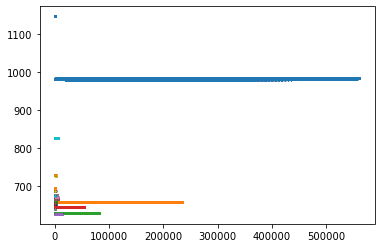

In [5]:
#    'filled_temp' (list of arrays): each element in the list is an array for the
#       values of the temperature in each coordinate
for ncloud in range(22):
    plt.plot(ellipsoid_dict['filled_temp'][ncloud],'.',markersize=1)


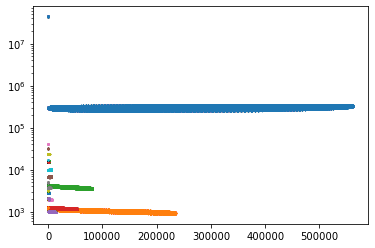

In [9]:
#    'filled_quc' (list of arrays): each element in the list is an array for the
#       values of the condensation fraction in each coordinate
for ncloud in range(22):
    plt.plot(ellipsoid_dict['filled_quc'][ncloud],'.',markersize=1)
plt.yscale('log')

In [ ]:
# Plot dust-gas-ratio here to compare numbers

import numpy as np
import matplotlib.pyplot as plt

gasdustratio = []

for ncloud in range(22):
    for data in ellipsoid_dict['filled_quc'][ncloud]/ellipsoid_dict['filled_rho'][ncloud]:
        gasdustratio.append(data)
plt.hist(gasdustratio,100);
plt.xscale('log')


In [ ]:
# Plot monomer number density here
import numpy as np
import matplotlib.pyplot as plt

monomerdensity = []
for ncloud in range(22):
    for data in ellipsoid_dict['filled_quc'][ncloud]:
        monomerdensity.append(data)

print(f'1e{np.log10(np.min(monomerdensity))}')
print(f'1e{np.log10(np.mean(monomerdensity))}')
print(f'1e{np.log10(np.max(monomerdensity))}')

#plt.plot(condensation,'.',markersize=1)
#plt.yscale('log')

plt.hist(monomerdensity,1000);
plt.xscale('log')


In [ ]:
# Plot dust density here
import numpy as np
import matplotlib.pyplot as plt

monomermass = 2.3362e-22

monomerdensity = []
for ncloud in range(22):
    for data in ellipsoid_dict['filled_quc'][ncloud]:
        monomerdensity.append(data*monomermass)

print(f'1e{np.log10(np.min(monomerdensity))}')
print(f'1e{np.log10(np.mean(monomerdensity))}')
print(f'1e{np.log10(np.max(monomerdensity))}')

#plt.plot(condensation,'.',markersize=1)
#plt.yscale('log')

plt.hist(monomerdensity,1000);
plt.xscale('log')

[0.02585142 0.05170284 0.10340568 0.10340568 0.10340568 0.10340568
 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568
 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568
 0.10340568 0.10340568 0.10340568 0.10340568]


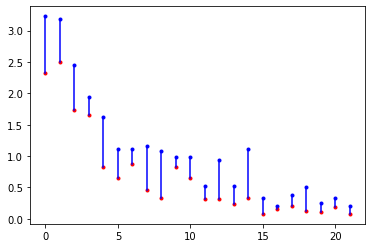

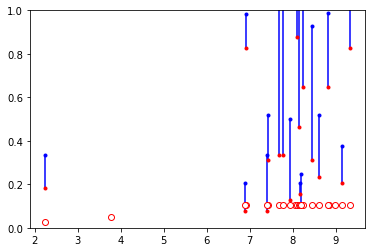

In [39]:

# Distance to ellispoids
cloud_r_au = ellipsoid_dict['distance_centre_grid']/AUcm
Ncloud = cloud_r_au.size


cloud_sizes = np.zeros(Ncloud)
cloud_sizes_minor = np.zeros(Ncloud)
cell_sizes = np.zeros(Ncloud)

for ncloud in range(Ncloud):

    # Size of ellipsoids
    cloud_sizes[ncloud] = np.array([
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].min()))/AUcm
    ]).max()

    cloud_sizes_minor[ncloud] = np.array([
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].min()))/AUcm
    ]).min()


    # Cell size at centre of cloud
    cell_sizes[ncloud] = 0.4136227230610557
    if cloud_r_au[ncloud] <= 13.203518763619835:
        cell_sizes[ncloud] = 0.20681136153052784
    if cloud_r_au[ncloud] <= 9.902639072714877:
        cell_sizes[ncloud] = 0.10340568076526392
    if cloud_r_au[ncloud] <= 6.601759381809917:
        cell_sizes[ncloud] = 0.05170284038263196
    if cloud_r_au[ncloud] <= 3.3008796909049587:
        cell_sizes[ncloud] = 0.02585142019131598



# Plot cloud size vs cloud "number"
plt.figure(1)
plt.plot(cloud_sizes,'b.')
plt.plot(cloud_sizes_minor,'r.')
for ncloud in range(Ncloud):
    plt.plot(
        [np.linspace(0,Ncloud-1,Ncloud)[ncloud],np.linspace(0,Ncloud-1,Ncloud)[ncloud]],
        [cloud_sizes[ncloud],cloud_sizes_minor[ncloud]],'b-'
    )


# Plot cloud size vs radial distance to centre, and grid cell size
plt.figure(2)
for ncloud in range(Ncloud):
    plt.plot(
        [cloud_r_au[ncloud],cloud_r_au[ncloud]],
        [cloud_sizes[ncloud],cloud_sizes_minor[ncloud]],'b-'
    )
plt.plot(cloud_r_au,cloud_sizes,'b.')
plt.plot(cloud_r_au,cloud_sizes_minor,'r.')
plt.plot(cloud_r_au,cell_sizes,'ro',markerfacecolor = 'w')
plt.ylim(0,1)
print(np.sort(cell_sizes))





## Test to create dust_density.inp

and other files

In [28]:
# Load an r3d-grid
import analyze_r3d_functions as a3d

griddistances = a3d.load_griddistances(
    gridpath = '../r3dresults/st28gm06n052_arief_tests/grid_distances.csv',
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
)
cellsizes = a3d.load_cellsizes(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
    sizepath = '../r3dresults/st28gm06n052_arief_tests/grid_cellsizes.csv',
)
nleafs = a3d.load_grid_properties(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp'
)[2]



In [ ]:
# Loop through coords of one of the ellipsoids and save in the r3d-grid
# In cm
import numpy as np
import pickle
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
import os


AUcm = 1.49598e13 # AU in cm cm
monomermass = 2.3362e-22 # Forsterite mass in g



print('Load data')

# Load Ariefs pickles
path = '../../exwings_archivedata/co5bold_data/st28gm06n052_arief_tests/filled-mean-ellipsoids_st28gm06n052-032.pickle'
with open(path, 'rb') as f:
    ellipsoid_dict = pickle.load(f)


# Load an r3d-grid
r3ddistances = a3d.load_griddistances(
    gridpath = '../r3dresults/st28gm06n052_arief_tests/grid_distances.csv',
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
)
r3dcellsizes = a3d.load_cellsizes(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
    sizepath = '../r3dresults/st28gm06n052_arief_tests/grid_cellsizes.csv',
)
nleafs = a3d.load_grid_properties(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp'
)[2]


In [1]:
import analyze_ellipsoidapprox as ael

# filled-mean-ellipsoids_st28gm06n052-032.pickle
# filled-radialdistribution-ellipsoids_st28gm06n052-032.pickle

ael.create_dustapproximation(
    picklepath = '../../exwings_archivedata/co5bold_data/st28gm06n052_arief_tests/filled-mean-ellipsoids_st28gm06n052-032.pickle'
)


Start time:
tor 21 dec 2023 10:33:19 CET
Loading data
  There are 22 dust clouds:
  Cloud 1 has 561184 c5d-cells.
      and 359485 r3d-cells.
  Cloud 2 has 234647 c5d-cells.
      and 18295 r3d-cells.
  Cloud 3 has 81480 c5d-cells.
      and 7595 r3d-cells.
  Cloud 4 has 53787 c5d-cells.
      and 5460 r3d-cells.
  Cloud 5 has 13482 c5d-cells.
      and 1603 r3d-cells.
  Cloud 6 has 5918 c5d-cells.
      and 480 r3d-cells.
  Cloud 7 has 6064 c5d-cells.
      and 891 r3d-cells.
  Cloud 8 has 4172 c5d-cells.
      and 420 r3d-cells.
  Cloud 9 has 2289 c5d-cells.
      and 176 r3d-cells.
  Cloud 10 has 5646 c5d-cells.
      and 1173 r3d-cells.
  Cloud 11 has 2026 c5d-cells.
      and 420 r3d-cells.
  Cloud 12 has 914 c5d-cells.
      and 45 r3d-cells.
  Cloud 13 has 1318 c5d-cells.
      and 108 r3d-cells.
  Cloud 14 has 456 c5d-cells.
      and 30 r3d-cells.
  Cloud 15 has 1121 c5d-cells.
      and 132 r3d-cells.
  Cloud 16 has 98 c5d-cells.
      and 9 r3d-cells.
  Cloud 17 has 116 c5d-

0.9004326654410133


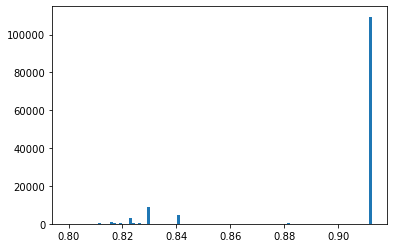

In [2]:
# Plot extracted grain sizes (before binning), in um
import numpy as np
import matplotlib.pyplot as plt

grainsizes = np.loadtxt(
    '../r3dresults/st28gm06n052_arief_tests/032_averages/grain_sizes_approx.dat'
)*1e4
grainsizes = grainsizes[np.where(grainsizes > 0)[0]]
plt.hist(grainsizes,100)
print(grainsizes.mean())


In [2]:
# Bin grain sizes
import analyze_co5bold_functions as a5d

# 032_averages
# 032_radialdist

a5d.bin_grainsizes(
    grainsizepath = '../r3dresults/st28gm06n052_arief_tests/032_averages/grain_sizes_approx.dat',
    phase = 'approx'
)



a5d.bin_grainsizes():
    grain_sizes_binned_approx.dat
DONE



In [1]:
# Bin all inp-data and write optool-script and dustopac-file
import analyze_ellipsoidapprox as ael

#path = '../r3dresults/st28gm06n052_arief_tests/032_radialdist/'
path = '../r3dresults/st28gm06n052_arief_tests/032_averages/'

ael.bin_inpdata(
    grainsizes_path = f'{path}grain_sizes_binned_approx.dat',
    density_path = f'{path}dust_density_approx.inp',
    temperature_path = f'{path}dust_temperature_approx.dat',
    wavelength_path = f'{path}wavelength_micron.inp'
)


Start binning of density and temperature
    Grain sizes are (um):
[0.8053, 0.8166, 0.8279, 0.8392, 0.8843000000000001, 0.9069]
yes
create_optoolscript:
    ../optool_script.sh
    ../dustopac_{specie}_{phase}.inp
DONE

  writing ...
  ../dust_density_approx_6bins.inp
  ../dust_temperature_approx_6bins.dat
DONE!


Extracting species mg2sio4_7.386e-01
Extracting species mg2sio4_7.659e-01
Extracting species mg2sio4_7.933e-01
Extracting species mg2sio4_8.206e-01
Extracting species mg2sio4_8.480e-01
Extracting species mg2sio4_9.300e-01
Extracting species mg2sio4_9.573e-01
Extracting species mg2sio4_9.847e-01


(<Figure size 432x936 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f653a30d3d0>,
       dtype=object))

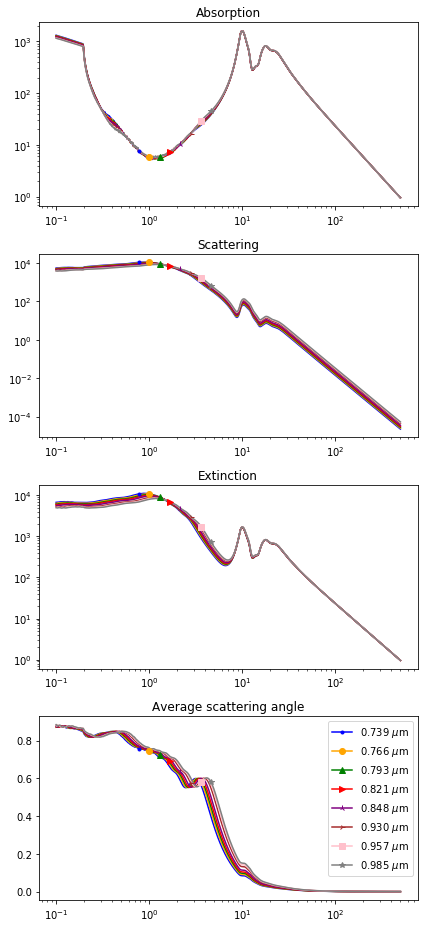

In [5]:
# Test plot the binned grain size optical data
import analyze_r3d_functions as a3d
a3d.plot_allkappa(path = '../r3dresults/st28gm06n052_arief_tests/032_averages/')

In [4]:
import numpy as np

path = '../r3dresults/st28gm06n052_arief_tests/032_radialdist/'
grainsizes_path = f'{path}grain_sizes_binned_approx.dat'
density_path = f'{path}dust_density_approx.inp'
temperature_path = f'{path}dust_temperature_approx.dat'
wavelength_path = f'{path}wavelength_micron.inp'


# Load binned grain sizes per grid cell
grainsizes_grid = []
with open(grainsizes_path, 'r') as fgrainsizes:
    for line in fgrainsizes.readlines():
        if line[0] != '#':
            grainsizes_grid.append(float(line))
grainsizes_grid = np.array(grainsizes_grid)

# Extract unique sizes
grainsizes = np.unique(grainsizes_grid)
# Only save the grainsizes that aren't zero
grainsizes = grainsizes[np.where(grainsizes > 0)[0]]
Nbins = len(grainsizes)
# Save separate list with grainsizes in um
grainsizes_list_um = grainsizes*1e4


print(grainsizes[-1])
print(grainsizes_list_um[-1]*1e-4)
print(np.unique(grainsizes_grid)[-1])
print(np.unique(grainsizes_grid)[-1] == grainsizes[-1])


9.847e-05
9.847000000000001e-05
9.847e-05
True


/tmp/ipykernel_6187/4107699975.py:43: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


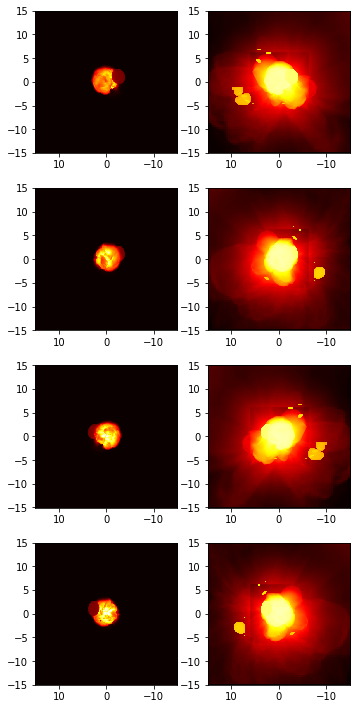

In [13]:
# Plot all 10um-images

import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

images = [
    'image_i000_phi000_10um.out',
    'image_i090_phi000_10um.out',
    'image_i180_phi000_10um.out',
    'image_i270_phi000_10um.out'
]


# Initialise fig
fig, ax = plt.subplots(
    4,2,
    figsize = (5,10),
)


for nimage,image in enumerate(images):

    image2d,image2dlog,totalflux,axisplot = a3d.load_images(
        path = '../r3dresults/st28gm06n052_arief_tests/032_186_radial_combine/',
        image = image
    )
    # Change to MJy per asec2
    image2d = image2d*1e-6

    ax[nimage][0].imshow(
        image2d, 
        origin='lower', extent=axisplot, 
        cmap=plt.get_cmap('hot'),
        vmin=0,
        vmax=1.5
    )
    ax[nimage][1].imshow(
        image2dlog, 
        origin='lower', extent=axisplot, 
        cmap=plt.get_cmap('hot'),
        vmin=-4,
        vmax=7
    )
fig.tight_layout()
fig.show()
fig.savefig(f'../r3dresults/st28gm06n052_arief_tests/032_186_radial_combine/images_10um.pdf', dpi=300, facecolor="white")



/tmp/ipykernel_5346/2934962957.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


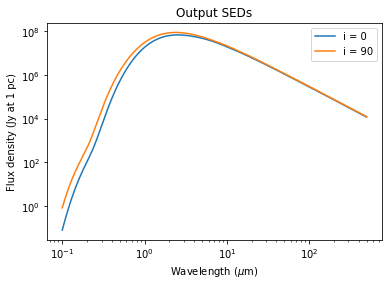

In [2]:
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d

fig,ax = a3d.plot_sedsmany(
    pathlist = [
        '../r3dresults/st28gm06n052_arief_tests/032_186_radial_combine/spectrum_i000_phi000.out',
        '../r3dresults/st28gm06n052_arief_tests/032_186_radial_combine/spectrum_i090_phi000.out',
    ],
    legendlist = [
        'i = 0',
        'i = 90'
    ],
    distance =1
)

fig.show()
fig.savefig(f'../r3dresults/st28gm06n052_arief_tests/032_186_radial_combine/seds.pdf', dpi=300, facecolor="white")




# 2025: new pickle-data translation tests

In [5]:
import pickle
import numpy as np
import data_unpacker
import analyze_r3d_functions as a3d

# Load relevant pickle file
# i.e. either as obtained from CO5BOLD (clumps); or derived ellipsoids
#filename='/home/ariah/dat/caucus/clumps-ellipsoids-comparison/'+'st28gm06n052-derivedclumps_200.pickle'
#filename='/home/ariah/dat/caucus/clumps-ellipsoids-comparison/'+'st28gm06n052-derivedellipsoids_200.pickle'

filename='../arief_data/st28gm06n052-derivedclumps_200.pickle'
with open(filename, 'rb') as handle:
    dustclumps = pickle.load(handle)

# Use Ariefs data unpacker to create new lists of data

#grid_filled_rho_dust=data_unpacker(679, dustclumps['coord_list'], dustclumps['rho_dust_list'])
#grid_filled_temperature=data_unpacker(679, dustclumps['coord_list'], dustclumps['temperature_list'])
#grid_filled_grainsizes=data_unpacker(679, dustclumps['coord_list'], dustclumps['grainsizes_list'])



# Load C5D-grid
#    needs to create grid-info-files first with a5d.load_grid_properties()
#    outputs 
#      c5dgrid       coordinates, xyz of each cell centre
#      cellcourners  similar coordinates for courners of cells
#      cellsize      just size of minimum cell size
c5dgrid = np.loadtxt('../arief_data/gridc5d_distances.csv')
Nc5dside = len(c5dgrid)

# Map data to R3D-grid and save r3d-input-files

# 1. Gas density
grid_filled_rho_gas=data_unpacker.data_unpacker(
    679, 
    dustclumps['coord_list'], 
    dustclumps['rho_gas_list']
)
# Translate to 3D numpy-array instead
c5dstar_densities = np.array(grid_filled_rho_gas)

print(np.shape(grid_filled_rho_gas))
print(np.shape(c5dstar_densities))
print(c5dstar_densities[0,0,0])




(679, 679, 679)
(679, 679, 679)
0.0


In [12]:
print(np.argwhere(c5dstar_densities>0)[0])


[ 26 387  48]


In [1]:
# Test box to run tests to load and translate A's data from pickle files to
# R3D-grid and create input data from radtrans.
import pickle
import numpy as np
import data_unpacker
import analyze_r3d_functions as a3d

# Load relevant pickle file
# i.e. either as obtained from CO5BOLD (clumps); or derived ellipsoids
#filename='/home/ariah/dat/caucus/clumps-ellipsoids-comparison/'+'st28gm06n052-derivedclumps_200.pickle'
#filename='/home/ariah/dat/caucus/clumps-ellipsoids-comparison/'+'st28gm06n052-derivedellipsoids_200.pickle'

filename='../arief_data/st28gm06n052-derivedclumps_200.pickle'
with open(filename, 'rb') as handle:
    dustclumps = pickle.load(handle)

# Use Ariefs data unpacker to create new lists of data
grid_filled_rho_gas=data_unpacker.data_unpacker(
    679, 
    dustclumps['coord_list'], 
    dustclumps['rho_gas_list']
)
grid_filled_rho_dust=data_unpacker.data_unpacker(
    679, 
    dustclumps['coord_list'], 
    dustclumps['rho_dust_list']
)
grid_filled_temperature=data_unpacker.data_unpacker(
    679, 
    dustclumps['coord_list'], 
    dustclumps['temperature_list']
)
grid_filled_grainsizes=data_unpacker.data_unpacker(
    679, 
    dustclumps['coord_list'], 
    dustclumps['grainsizes_list']
)
# Translate to 3D numpy-array instead
c5dstar_densities = np.array(grid_filled_rho_gas)
c5ddust_densities = np.array(grid_filled_rho_dust)
c5dstar_temperatures = np.array(grid_filled_temperature)
c5ddust_grainsizes = np.array(grid_filled_grainsizes)

# Load C5D-grid
#    needs to create grid-info-files first with a5d.load_grid_properties()
#    outputs 
#      c5dgrid       coordinates, xyz of each cell centre
#      cellcourners  similar coordinates for courners of cells
#      cellsize      just size of minimum cell size
c5dgrid = np.loadtxt('../arief_data/gridc5d_distances.csv')
Nc5dside = len(c5dgrid)

# Map data to R3D-grid and save r3d-input-files




# Load R3D-grid
nxyz,nrefines,nleafs,nbranch,gridedge = a3d.load_grid_properties(
    amrpath='../arief_data/amr_grid.inp'    
)
r3ddistances = a3d.load_griddistances(
    gridpath='../arief_data/grid_distances.csv',
    amrpath='../arief_data/amr_grid.inp'
)
r3dcellsizes = a3d.load_cellsizes(
    amrpath='../arief_data/amr_grid.inp',
    sizepath='../arief_data/grid_cellsizes.csv'
)

# Start mapping data
r3d_stardensities = 0
r3d_dustdensities = 0
r3d_temperatures = 0
r3d_grainsizes = 0
progbar = 0

with open(f'../dust_density_onestar.inp', 'w') as fdensity, \
     open(f'../dust_density_dust.inp', 'w') as fdustdensity, \
     open(f'../dust_temperature_onestar.dat','w') as ftemperature, \
     open(f'../grain_sizes.dat','w') as fgrainsize:
    # Write headers:
    # 1
    # nleafs
    # number dust species
    fdensity.write(f'1\n{int(nleafs)}\n1\n')
    fdustdensity.write(f'1\n{int(nleafs)}\n1\n')
    ftemperature.write(f'1\n{int(nleafs)}\n1\n')
    #
    # Different header for grain size file:
    fgrainsize.write('# List of grain sizes for each cell. Not-binned.\n')
    fgrainsize.write('# Same order as in R3D-density and temperature-files\n')

    # Loop over R3D-grid
    for nr3d in range(nleafs):

        # Extract size range for current r3dcell
        r3dxrange = [
            r3ddistances[nr3d,1]-0.5*r3dcellsizes[nr3d],
            r3ddistances[nr3d,1]+0.5*r3dcellsizes[nr3d]
        ]
        r3dyrange = [
            r3ddistances[nr3d,2]-0.5*r3dcellsizes[nr3d],
            r3ddistances[nr3d,2]+0.5*r3dcellsizes[nr3d]
        ]
        r3dzrange = [
            r3ddistances[nr3d,3]-0.5*r3dcellsizes[nr3d],
            r3ddistances[nr3d,3]+0.5*r3dcellsizes[nr3d]
        ]   
        # Extract indeces of all c5dcells within current r3dcell
        c5dxrange = np.argwhere(
            r3dxrange[0] <= c5dgrid[np.argwhere(c5dgrid <= r3dxrange[1])]
        )[:,0]
        c5dyrange = np.argwhere(
            r3dyrange[0] <= c5dgrid[np.argwhere(c5dgrid <= r3dyrange[1])]
        )[:,0]
        c5dzrange = np.argwhere(
            r3dzrange[0] <= c5dgrid[np.argwhere(c5dgrid <= r3dzrange[1])]
        )[:,0]
        # Counter for number of c5dcells within r3dcell
        nchildcells = 0

        # Then loop through c5dcells within r3dcell
        for nnz in c5dzrange:
            for nny in c5dyrange:
                for nnx in c5dxrange:

                    # Save sum of all c5d-data for each r3d-cell
                    r3d_stardensities += c5dstar_densities[nnx,nny,nnz]
                    r3d_dustdensities += c5ddust_densities[nnx,nny,nnz]
                    r3d_temperatures += c5dstar_temperatures[nnx,nny,nnz]
                    r3d_grainsizes += c5ddust_grainsizes[nnx,nny,nnz]

                    # Number of cells
                    nchildcells += 1


        # Check if there actually are any c5dcells within r3dcell
        # If not, then your r3dgrid is probably smaller than the c5dgrid
        # and then the density and temperature will be zero for some cells
        if nchildcells > 0:
            # Otherwise save the average of the c5d-data of each r3dcell
            r3d_stardensities /= nchildcells
            r3d_dustdensities /= nchildcells
            r3d_temperatures /= nchildcells
            r3d_grainsizes /= nchildcells
        else:
            r3d_stardensities = c5dstar_densities[c5dxrange[0],c5dyrange[0],c5dzrange[0]]
            r3d_dustdensities = c5ddust_densities[c5dxrange[0],c5dyrange[0],c5dzrange[0]]
            r3d_temperatures = c5dstar_temperatures[c5dxrange[0],c5dyrange[0],c5dzrange[0]]
            r3d_grainsizes = c5ddust_grainsizes[c5dxrange[0],c5dyrange[0],c5dzrange[0]]
            print(f'  ERROR: nchildcells = {nchildcells}')

        # Then write data to r3d files
        fdensity.write(f'{r3d_stardensities}\n')
        fdustdensity.write(f'{r3d_dustdensities}\n')
        ftemperature.write(f'{r3d_temperatures}\n')
        fgrainsize.write(f'{r3d_grainsizes}\n')

        # Reset data
        r3d_stardensities = 0
        r3d_dustdensities = 0
        r3d_temperatures = 0
        r3d_grainsizes = 0

        # Some progress bar info
        if int(nr3d/nleafs*100) == 25 and progbar == 0:
            progbar += 1
            print('  Finished 25 per cent of the grid.')

        if int(nr3d/nleafs*100) == 50 and progbar == 1:
            progbar += 1
            print('  Finished 50 per cent of the grid.')

        if int(nr3d/nleafs*100) == 75 and progbar == 2:
            progbar += 1
            print('  Finished 75 per cent of the grid.')

print('DONE')






  Finished 25 per cent of the grid.
  Finished 50 per cent of the grid.
  Finished 75 per cent of the grid.
DONE


In [2]:
# Check grain sizes
import numpy as np
import analyze_r3d_functions as a3d
import analyze_co5bold_functions as a5d

# Load grain sizes
#grainsizes,nleafs = a3d.load_grainsizes(
#    grainsize_path='../arief_data/st28gm06n052_derivedclumps/200/grain_sizes.dat'
#)
# Check what there is
#print(len(np.unique(grainsizes)))

# Bin grain sizes to 10 bins linearly
a5d.bin_grainsizes(
    grainsizepath=f'..//arief_data/st28gm06n052_derivedclumps/200/grain_sizes.dat',
    phase=200,
    nbins=10,
    lin='y'
)
# Output is ../grain_sizes_binned_{phase}.dat




11513
Running: a5d.bin_grainsizes()
a5d.bin_grainsizes():
    grain_sizes_binned_200.dat
DONE



In [4]:
# Check binned grain sizes
import numpy as np
import analyze_r3d_functions as a3d

# Load grain sizes
grainsizes,nleafs = a3d.load_grainsizes(
    grainsize_path='../arief_data/st28gm06n052_derivedclumps/200/grain_sizes_binned.dat'
)
# Check what there is
print(np.unique(grainsizes))
print(len(np.unique(grainsizes)))


[0.000e+00 4.693e-06 1.373e-05 2.276e-05 3.180e-05 4.083e-05 4.986e-05
 5.890e-05 6.793e-05 7.697e-05 8.600e-05]
11


In [1]:
# write new density and temperature files based on grain size bins:
# pieces copied from a5d.create_dustfiles(

import numpy as np
import analyze_r3d_functions as a3d
import os

print('Running: re-writing dust data to grain size bins')

grainsizepath = '../arief_data/st28gm06n052_derivedclumps/200/grain_sizes_binned.dat'
dustdensitypath = '../arief_data/st28gm06n052_derivedclumps/200/dust_density_dust.inp'
dusttemperaturepath = '../arief_data/st28gm06n052_derivedclumps/200/dust_temperature_onestar.dat'

# Load R3D grid-details
print('  Loading R3D grid')
amrpath = '../arief_data/amr_grid.inp'    
#gridpath='../arief_data/grid_distances.csv'
#sizepath='../arief_data/grid_cellsizes.csv'

nleafs = a3d.load_grid_properties(amrpath=amrpath)[2]
#r3ddistances = a3d.load_griddistances(amrpath=amrpath,gridpath=gridpath)
#r3dcellsizes = a3d.load_cellsizes(amrpath=amrpath,sizepath=sizepath)

# Load r3d-dust density file, not-binned
Ncells,Nspec,dust_density = a3d.load_dustdensity(
    path=dustdensitypath
)
# Load r3d-temperature-file, not binned
# NOTE! I don't care about re-normalising the temperature yet to bladh-approx!
Ncells,Nspec,dust_temperature = a3d.load_temperature(
    path=dusttemperaturepath
)

# Load binned grain sizes (first check if they exist)
print('  Loading grain sizes')
if os.path.exists(grainsizepath) == True:
    grainsizes,Nleafs = a3d.load_grainsizes(
        grainsize_path=grainsizepath
    )
    # Change unit to um
    grainsizes *= 1e4

    # Extract an array with the grain sizes only
    grainsizes_uniq = np.unique(grainsizes[np.where(grainsizes > 0)[0]])

    # List of grain sizes and number of bins (in micrometers!)
    Ngrainsizes = grainsizes_uniq.size
    print(f'  Available ({Ngrainsizes}) grain sizez are (um): {grainsizes_uniq}\n')
else:
    # Create place-holder lists
    grainsizes = [0]
    grainsizes_uniq = [0]
    Ngrainsizes = 1


# Open new r3d-files to bin data in
with open(f'../dust_density_dust_binned.inp', 'w') as fdensity, \
     open(f'../dust_temperature_dust_binned.dat', 'w') as ftemperature:

    # Write headers:
    #
    # Density:
    # 1
    # nleafs
    # number dust species
    fdensity.write(f'1\n{int(nleafs)}\n{int(Ngrainsizes)}\n')

    # Temperature:
    # 1
    # nleafs
    # number dust species
    ftemperature.write(f'1\n{int(nleafs)}\n{int(Ngrainsizes)}\n')

    # Loop of grain sizes of each specie
    for nsize,size in enumerate(grainsizes_uniq):

        # Write densities and temperatures in files according to R3D-syntax.
        # Each grain size bin is listed in same files but after eachother.

        # Some output
        print(f'  Writing dust grain size numb {nsize}: {size:.3e}um')

        # Loop over the r3d-grid
        for nr3d in range(nleafs):

            # kolla om nr3d-positionens grain size stämmer med size ovanför
            # då kan jag skriva ned density och temperatur i rätt fil
            # annars skriver den noll
            # så delar jag upp  den i grain size bins

            if grainsizes[nr3d] == size:
                fdensity.write(f'{dust_density[nr3d]}\n')
                ftemperature.write(f'{dust_temperature[nr3d]}\n')

            else:
                fdensity.write('0.0\n')
                ftemperature.write('0.0\n')






Running: re-writing dust data to grain size bins
  Loading R3D grid
  Loading grain sizes
  Available (10) grain sizez are (um): [0.04693 0.1373  0.2276  0.318   0.4083  0.4986  0.589   0.6793  0.7697
 0.86   ]

  Writing dust grain size numb 0: 4.693e-02um
  Writing dust grain size numb 1: 1.373e-01um
  Writing dust grain size numb 2: 2.276e-01um
  Writing dust grain size numb 3: 3.180e-01um
  Writing dust grain size numb 4: 4.083e-01um
  Writing dust grain size numb 5: 4.986e-01um
  Writing dust grain size numb 6: 5.890e-01um
  Writing dust grain size numb 7: 6.793e-01um
  Writing dust grain size numb 8: 7.697e-01um
  Writing dust grain size numb 9: 8.600e-01um


In [2]:
# Write opac-file and optool-script
import create_r3d_functions as c3d

path = '../arief_data/'
phase = 200
specie = 'mg2sio4'

c3d.create_optoolscript(
    wavelength_path=f'{path}wavelength_micron.inp',
    phase=phase,
    grainum_sizes=f'{path}st28gm06n052_derivedclumps/{phase}/grain_sizes_binned.dat',
    grainsize_type='normal',
    grainsize_na=21,
    specie=specie,
    grain_type='dhs'
)   

# move files and runt script
# TODO





Running create_optoolscript:
Extracting grain sizes from ../arief_data/st28gm06n052_derivedclumps/200/grain_sizes_binned.dat
    Grain sizes are (um):
[0.04693 0.1373  0.2276  0.318   0.4083  0.4986  0.589   0.6793  0.7697
 0.86   ]
  ../optool_script_200.sh
  ../dustopac_mg2sio4_200.inp
DONE



In [3]:
# Tests to translate data and rotate the dust distribution
# To find a correct rotation so that the angles correspond to my angles
# from the original C5D-data


import os
import pickle
import numpy as np
import data_unpacker
import analyze_r3d_functions as a3d
import create_r3d_functions as c3d
import analyze_co5bold_functions as a5d


# Script to load and translate A's picklefiles to R3D-format
print('Running: scriptpy to translate pickle-file data to r3d-format')

# Define model parameters and file names
modelname = 'st28gm06n052'
approxdesignations = [
    'derivedclumps',
]
snapshots = [
    '150'
]


# Loop over all
for approxdesignation in approxdesignations:
    
    # Create model folder
    os.system(f'mkdir ../arief_data/{modelname}_{approxdesignation}')
    
    for snapshot in snapshots:

        print(f'  Doing {modelname}_{approxdesignation}: {snapshot}')

        # Define and create output path
        outputpath = f'../arief_data/{modelname}_{approxdesignation}/{snapshot}'
        os.system(f'mkdir {outputpath}')


        # Load relevant pickle file
        # i.e. either as obtained from CO5BOLD (clumps); or derived ellipsoids
        print(f'  Loading pickle file: {modelname}-{approxdesignation}_{snapshot}.pickle')
        filename = f'../arief_data/{modelname}-{approxdesignation}_{snapshot}.pickle'

        with open(filename, 'rb') as handle:
            dustclumps = pickle.load(handle)

        # Use Ariefs data unpacker to create new lists of data
        # Skip rho_gas, use original star for comparisons
        grid_filled_rho_dust=data_unpacker.data_unpacker(
            679, 
            dustclumps['coord_list'], 
            dustclumps['rho_dust_list']
        )
        grid_filled_temperature=data_unpacker.data_unpacker(
            679, 
            dustclumps['coord_list'], 
            dustclumps['temperature_list']
        )
        grid_filled_grainsizes=data_unpacker.data_unpacker(
            679, 
            dustclumps['coord_list'], 
            dustclumps['grainsizes_list']
        )
        # Change to 3D numpy-array and rotate
        #
        # NOTE
        # should be(?)
        # So i -> i-90
        # and phi -> phi+90
        #
        # https://numpy.org/doc/stable/reference/generated/numpy.rot90.html
        #
        # k=1 -> antal ggr: 1=90grader, 2=180grader, -1=-90grader
        # axex=(0,1) -> rot i plan 0-1, runt 2
        #
        # Sen har jag flip också som också kan behöa användas
        #
        # (0,2) sätter "i" rätt


        c5ddust_densities = np.flip(np.rot90(np.rot90(np.rot90(
            np.array(grid_filled_rho_dust),
            k=-1, axes=(0,1)),
            k=-1, axes=(1,2)),
            k=-1, axes=(0,1)),
            axis=1
        )
        c5dstar_temperatures = np.flip(np.rot90(np.rot90(np.rot90(
            np.array(grid_filled_temperature),
            k=-1, axes=(0,1)),
            k=-1, axes=(1,2)),
            k=-1, axes=(0,1)),
            axis=1
        )
        c5ddust_grainsizes = np.flip(np.rot90(np.rot90(np.rot90(
            np.array(grid_filled_grainsizes),
            k=-1, axes=(0,1)),
            k=-1, axes=(1,2)),
            k=-1, axes=(0,1)),
            axis=1
        )


        # Load C5D-grid
        print('  Loading CO5BOLD grid')
        c5dgrid = np.loadtxt('../arief_data/gridc5d_distances.csv')
        Nc5dside = len(c5dgrid)

        # Load R3D-grid
        print('  Loading RADMC3D grid')
        nxyz,nrefines,nleafs,nbranch,gridedge = a3d.load_grid_properties(
            amrpath='../arief_data/amr_grid.inp'    
        )
        r3ddistances = a3d.load_griddistances(
            gridpath='../arief_data/grid_distances.csv',
            amrpath='../arief_data/amr_grid.inp'
        )
        r3dcellsizes = a3d.load_cellsizes(
            amrpath='../arief_data/amr_grid.inp',
            sizepath='../arief_data/grid_cellsizes.csv'
        )

        # Start translating to R3D-grid to various inp-files
        # Start mapping data
        print('  Translating data to RADMC3D grid')
        r3d_dustdensities = 0
        r3d_temperatures = 0
        r3d_grainsizes = 0
        progbar = 0

        with open(f'../dust_density_dust.inp', 'w') as fdustdensity, \
            open(f'../dust_temperature_onestar.dat','w') as ftemperature, \
            open(f'../grain_sizes.dat','w') as fgrainsize:
            
            # Write headers:
            # 1
            # nleafs
            # number dust species (for density and temperature files)
            fdustdensity.write(f'1\n{int(nleafs)}\n1\n')
            ftemperature.write(f'1\n{int(nleafs)}\n1\n')
            # Info for grain size file
            fgrainsize.write('# List of grain sizes for each cell. Not-binned.\n')
            fgrainsize.write('# Same order as in R3D-density and temperature-files\n')

            # Loop over R3D-grid
            for nr3d in range(nleafs):

                # Extract size range for current r3dcell
                r3dxrange = [
                    r3ddistances[nr3d,1]-0.5*r3dcellsizes[nr3d],
                    r3ddistances[nr3d,1]+0.5*r3dcellsizes[nr3d]
                ]
                r3dyrange = [
                    r3ddistances[nr3d,2]-0.5*r3dcellsizes[nr3d],
                    r3ddistances[nr3d,2]+0.5*r3dcellsizes[nr3d]
                ]
                r3dzrange = [
                    r3ddistances[nr3d,3]-0.5*r3dcellsizes[nr3d],
                    r3ddistances[nr3d,3]+0.5*r3dcellsizes[nr3d]
                ]   
                # Extract indeces of all c5dcells within current r3dcell
                c5dxrange = np.argwhere(
                    r3dxrange[0] <= c5dgrid[np.argwhere(c5dgrid <= r3dxrange[1])]
                )[:,0]
                c5dyrange = np.argwhere(
                    r3dyrange[0] <= c5dgrid[np.argwhere(c5dgrid <= r3dyrange[1])]
                )[:,0]
                c5dzrange = np.argwhere(
                    r3dzrange[0] <= c5dgrid[np.argwhere(c5dgrid <= r3dzrange[1])]
                )[:,0]
                # Counter for number of c5dcells within r3dcell
                nchildcells = 0

                # Then loop through c5dcells within r3dcell
                for nnz in c5dzrange:
                    for nny in c5dyrange:
                        for nnx in c5dxrange:

                            # Save sum of all c5d-data for each r3d-cell
                            r3d_dustdensities += c5ddust_densities[nnx,nny,nnz]
                            r3d_temperatures += c5dstar_temperatures[nnx,nny,nnz]
                            r3d_grainsizes += c5ddust_grainsizes[nnx,nny,nnz]

                            # Number of cells
                            nchildcells += 1

                # Check if there actually are any c5dcells within r3dcell
                # If not, then your r3dgrid is probably smaller than the c5dgrid
                # and then the density and temperature will be zero for some cells
                if nchildcells > 0:
                    # Otherwise save the average of the c5d-data of each r3dcell
                    r3d_dustdensities /= nchildcells
                    r3d_temperatures /= nchildcells
                    r3d_grainsizes /= nchildcells
                else:
                    r3d_dustdensities = c5ddust_densities[c5dxrange[0],c5dyrange[0],c5dzrange[0]]
                    r3d_temperatures = c5dstar_temperatures[c5dxrange[0],c5dyrange[0],c5dzrange[0]]
                    r3d_grainsizes = c5ddust_grainsizes[c5dxrange[0],c5dyrange[0],c5dzrange[0]]
                    print(f'  ERROR: nchildcells = {nchildcells}')

                # Then write data to r3d files
                fdustdensity.write(f'{r3d_dustdensities}\n')
                ftemperature.write(f'{r3d_temperatures}\n')
                fgrainsize.write(f'{r3d_grainsizes}\n')

                # Reset data
                r3d_dustdensities = 0
                r3d_temperatures = 0
                r3d_grainsizes = 0

                # Some progress bar info
                if int(nr3d/nleafs*100) == 25 and progbar == 0:
                    progbar += 1
                    print('    Finished 25 per cent of the grid.')

                if int(nr3d/nleafs*100) == 50 and progbar == 1:
                    progbar += 1
                    print('    Finished 50 per cent of the grid.')

                if int(nr3d/nleafs*100) == 75 and progbar == 2:
                    progbar += 1
                    print('    Finished 75 per cent of the grid.')

        print('    Finished writing inp/dat-files, moving to correct folders')
        os.system(f'mv ../dust_density_dust.inp {outputpath}/')
        os.system(f'mv ../dust_temperature_onestar.dat {outputpath}/')
        os.system(f'mv ../grain_sizes.dat {outputpath}/')


        print('  Running: binning of grain sizes to 10 bins and ')
        # Bin sizes
        a5d.bin_grainsizes(
            grainsizepath=f'{outputpath}/grain_sizes.dat',
            phase=snapshot,
            nbins=10,
            lin='y'
        )
        # Output is ../grain_sizes_binned_{phase}.dat
        # Move to correct folder
        os.system(f'mv ../grain_sizes_binned_{snapshot}.dat {outputpath}/grain_sizes_binned.dat')


        # Load r3d-dust density file, not-binned
        Ncells,Nspec,dust_density = a3d.load_dustdensity(
            path=f'{outputpath}/dust_density_dust.inp'
        )
        # Load r3d-temperature-file, not binned
        # NOTE! I don't care about re-normalising the temperature yet to bladh-approx!
        Ncells,Nspec,dust_temperature = a3d.load_temperature(
            path=f'{outputpath}/dust_temperature_onestar.dat'
        )

        # Load binned grain sizes (first check if they exist)
        print('    Loading grain sizes')
        if os.path.exists(f'{outputpath}/grain_sizes_binned.dat') == True:
            grainsizes,Nleafs = a3d.load_grainsizes(
                grainsize_path=f'{outputpath}/grain_sizes_binned.dat'
            )
            # Change unit to um
            grainsizes *= 1e4

            # Extract an array with the grain sizes only
            grainsizes_uniq = np.unique(grainsizes[np.where(grainsizes > 0)[0]])

            # List of grain sizes and number of bins (in micrometers!)
            Ngrainsizes = grainsizes_uniq.size
            print(f'    Available ({Ngrainsizes}) grain sizez are (um): {grainsizes_uniq}')
        else:
            # Create place-holder lists
            grainsizes = np.zeros(nleafs)
            grainsizes_uniq = [0]
            Ngrainsizes = 1


        # Open new r3d-files to bin data in
        with open(f'{outputpath}/dust_density_dust_binned.inp', 'w') as fdensity, \
            open(f'{outputpath}/dust_temperature_dust_binned.dat', 'w') as ftemperature:

            # Write headers:
            #
            # Density:
            # 1
            # nleafs
            # number dust species
            fdensity.write(f'1\n{int(nleafs)}\n{int(Ngrainsizes)}\n')

            # Temperature:
            # 1
            # nleafs
            # number dust species
            ftemperature.write(f'1\n{int(nleafs)}\n{int(Ngrainsizes)}\n')

            # Loop of grain sizes of each specie
            for nsize,size in enumerate(grainsizes_uniq):

                # Write densities and temperatures in files according to R3D-syntax.
                # Each grain size bin is listed in same files but after eachother.

                # Some output
                print(f'    Writing dust grain size numb {nsize}: {size:.3e}um')

                # Loop over the r3d-grid
                for nr3d in range(nleafs):

                    # kolla om nr3d-positionens grain size stämmer med size ovanför
                    # då kan jag skriva ned density och temperatur i rätt fil
                    # annars skriver den noll
                    # så delar jag upp  den i grain size bins
                    
                    # TODO
                    # In case it's needed, adapt dust temperature here to
                    # Bladh-approximation

                    if grainsizes[nr3d] == size:
                        fdensity.write(f'{dust_density[nr3d]}\n')
                        ftemperature.write(f'{dust_temperature[nr3d]}\n')

                    else:
                        fdensity.write('0.0\n')
                        ftemperature.write('0.0\n')


        # Write opac-file and optool-script
        print('  Writing opac-files.')

        specie = 'mg2sio4'

        c3d.create_optoolscript(
            wavelength_path=f'../arief_data/wavelength_micron.inp',
            phase=snapshot,
            grainum_sizes=f'{outputpath}/grain_sizes_binned.dat',
            grainsize_type='normal',
            grainsize_na=21,
            specie=specie,
            grain_type='dhs'
        )   
        # Move files
        os.system(f'mv ../optool_script_{snapshot}.sh {outputpath}/optool_script.sh')
        os.system(f'mv ../dustopac_{specie}_{snapshot}.inp {outputpath}/dustopac_dust.inp')
        # Run script
        os.system(f'{outputpath}/optool_script.sh')
        # Move results
        os.system(f'mv *mg2sio4* {outputpath}/')

        print(f'  Done: {modelname}_{approxdesignation}: {snapshot}\n')


os.system('spd-say moo')




Running: scriptpy to translate pickle-file data to r3d-format
  Doing st28gm06n052_derivedclumps: 150
  Loading pickle file: st28gm06n052-derivedclumps_150.pickle


mkdir: cannot create directory ‘../arief_data/st28gm06n052_derivedclumps’: File exists
mkdir: cannot create directory ‘../arief_data/st28gm06n052_derivedclumps/150’: File exists


  Loading CO5BOLD grid
  Loading RADMC3D grid
  Translating data to RADMC3D grid
    Finished 25 per cent of the grid.
    Finished 50 per cent of the grid.
    Finished 75 per cent of the grid.
    Finished writing inp/dat-files, moving to correct folders
  Running: binning of grain sizes to 10 bins and 
Running: a5d.bin_grainsizes()
a5d.bin_grainsizes():
    grain_sizes_binned_150.dat
DONE

    Loading grain sizes
    Available (10) grain sizez are (um): [0.05304 0.1552  0.2573  0.3595  0.4616  0.5638  0.6659  0.7681  0.8702
 0.9723 ]
    Writing dust grain size numb 0: 5.304e-02um
    Writing dust grain size numb 1: 1.552e-01um
    Writing dust grain size numb 2: 2.573e-01um
    Writing dust grain size numb 3: 3.595e-01um
    Writing dust grain size numb 4: 4.616e-01um
    Writing dust grain size numb 5: 5.638e-01um
    Writing dust grain size numb 6: 6.659e-01um
    Writing dust grain size numb 7: 7.681e-01um
    Writing dust grain size numb 8: 8.702e-01um
    Writing dust grain si

0

In [1]:
# Merge star and dust data
import data_unpacker
import os

workpath = '../arief_data/st28gm06n052_derivedclumps/150/'

data_unpacker.merge_final_data(
    workpath=workpath
)
os.system(f'mv {workpath}dust_density_merged.inp {workpath}dust_density.inp')
os.system(f'mv {workpath}dust_temperature_merged.dat {workpath}dust_temperature.dat')
os.system(f'mv {workpath}dustopac_merged.inp {workpath}dustopac.inp')

os.system('spd-say moo')
# Then run r3d-script in terminal


Merging 2 dust_density_*.inp files in ../arief_data/st28gm06n052_derivedclumps/150/
merge_dustdensities:
    ../arief_data/st28gm06n052_derivedclumps/150/dust_density_merged.inp
DONE

Merging 2 dust_temperature_*.dat files in ../arief_data/st28gm06n052_derivedclumps/150/
merge_dustdensities:
    ../arief_data/st28gm06n052_derivedclumps/150/dust_temperature.dat
DONE

Merging 2 dustopac_*.inp files in ../arief_data/st28gm06n052_derivedclumps/150/
merge_dustopac:
    ../arief_data/st28gm06n052_derivedclumps/150/dustopac_merged.inp
DONE



0

## Remove spikes in finished images and SED

Doing folder: ../r3dresults/st28gm06n052_arief/derivedclumps
Doing folder: ../r3dresults/st28gm06n052_arief/derivedellipsoids


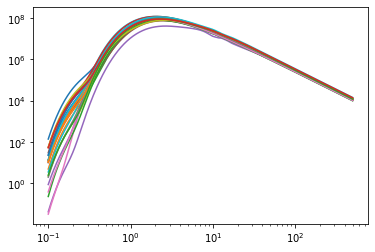

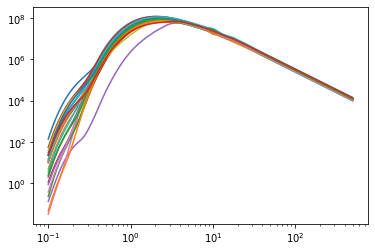

In [1]:
# Remove spikes
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import os

# Remove spikes from SED
# Merge SEDs with different seeds

folders = [
    '../r3dresults/st28gm06n052_arief/derivedclumps',
    '../r3dresults/st28gm06n052_arief/derivedellipsoids',
]
phases = [
    150,200,250,300
]
angles = [
    'i000_phi000',
    'i090_phi000',
    'i090_phi090',
    'i090_phi270',
    'i180_phi000',
    'i270_phi000',
]
images = [
    'image_i000_phi000_01um.out',
    'image_i000_phi000_02um.out',
    'image_i000_phi000_10um.out',
    'image_i090_phi000_01um.out',
    'image_i090_phi000_02um.out',
    'image_i090_phi000_10um.out',
    'image_i090_phi090_01um.out',
    'image_i090_phi090_02um.out',
    'image_i090_phi090_10um.out',
    'image_i090_phi270_01um.out',
    'image_i090_phi270_02um.out',
    'image_i090_phi270_10um.out',
    'image_i180_phi000_01um.out',
    'image_i180_phi000_02um.out',
    'image_i180_phi000_10um.out',
    'image_i270_phi000_01um.out',
    'image_i270_phi000_02um.out',
    'image_i270_phi000_10um.out'
]
for folder in folders:
    print(f'Doing folder: {folder}')

    for phase in phases:
        for angle in angles:

            a,b = a3d.remove_sedspikes(
                paths = [
                            f'{folder}_{phase}_s1/spectrum_{angle}.out',
                            f'{folder}_{phase}_s2/spectrum_{angle}.out',
                            f'{folder}_{phase}_s3/spectrum_{angle}.out',
                        ],
                save=True
            )
            if os.path.exists(f'{folder}_{phase}_nospikes') == False:
                os.system(f'mkdir {folder}_{phase}_nospikes')
            os.system(f'mv ../spectrum.out {folder}_{phase}_nospikes/spectrum_{angle}.out')

            # Plot SEDs for inspection
            plt.figure(num=folder)
            plt.plot(a,b)
            plt.xscale('log')
            plt.yscale('log')

        for image in images:
            image1d = a3d.remove_imagespikes(
                folders = [
                    f'{folder}_{phase}_s1/',
                    f'{folder}_{phase}_s2/',
                    f'{folder}_{phase}_s3/',
                ],
                imagefilename = image
            )
            os.system(f'mv ../{image}  {folder}_{phase}_nospikes/')




0

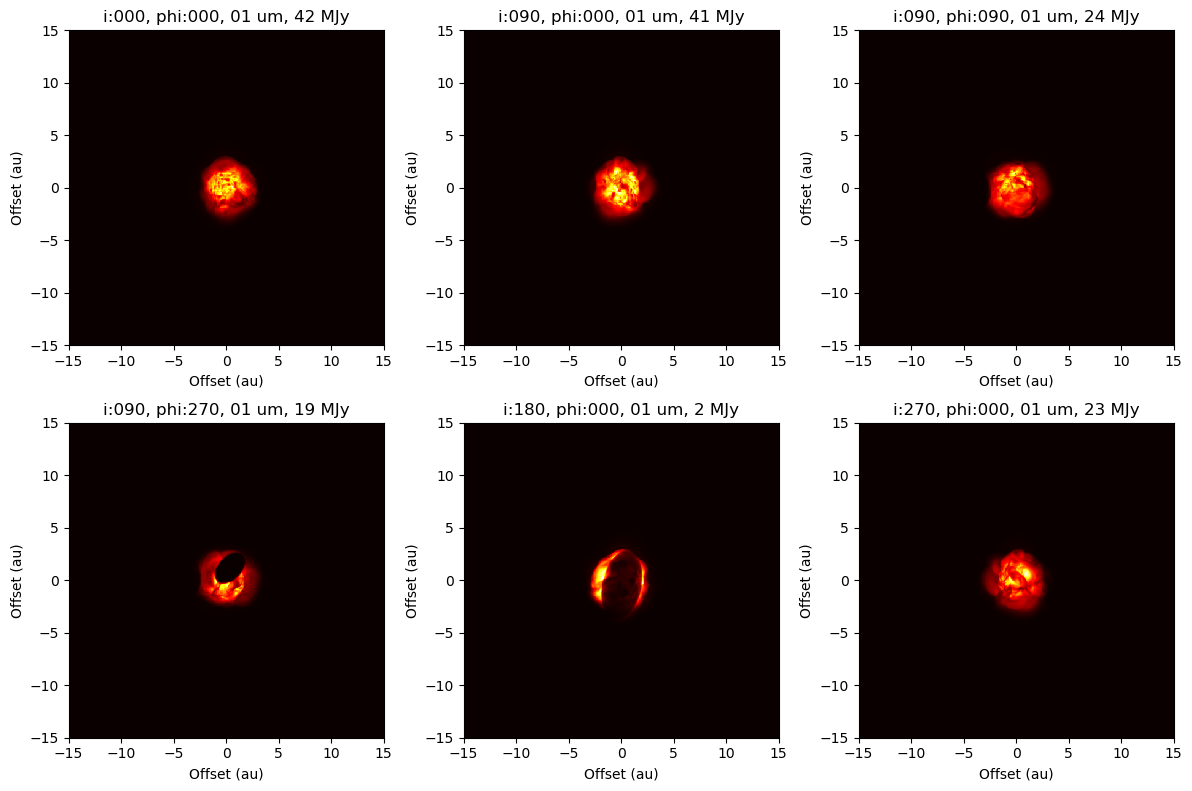

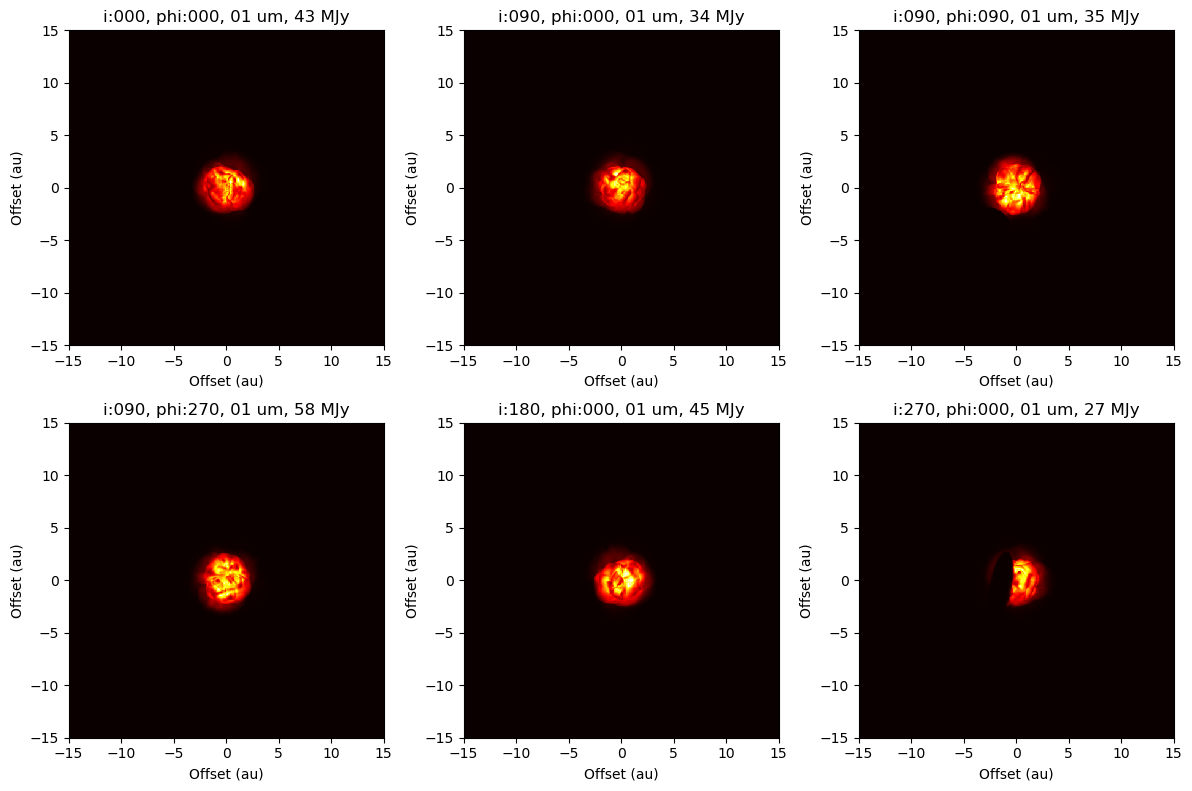

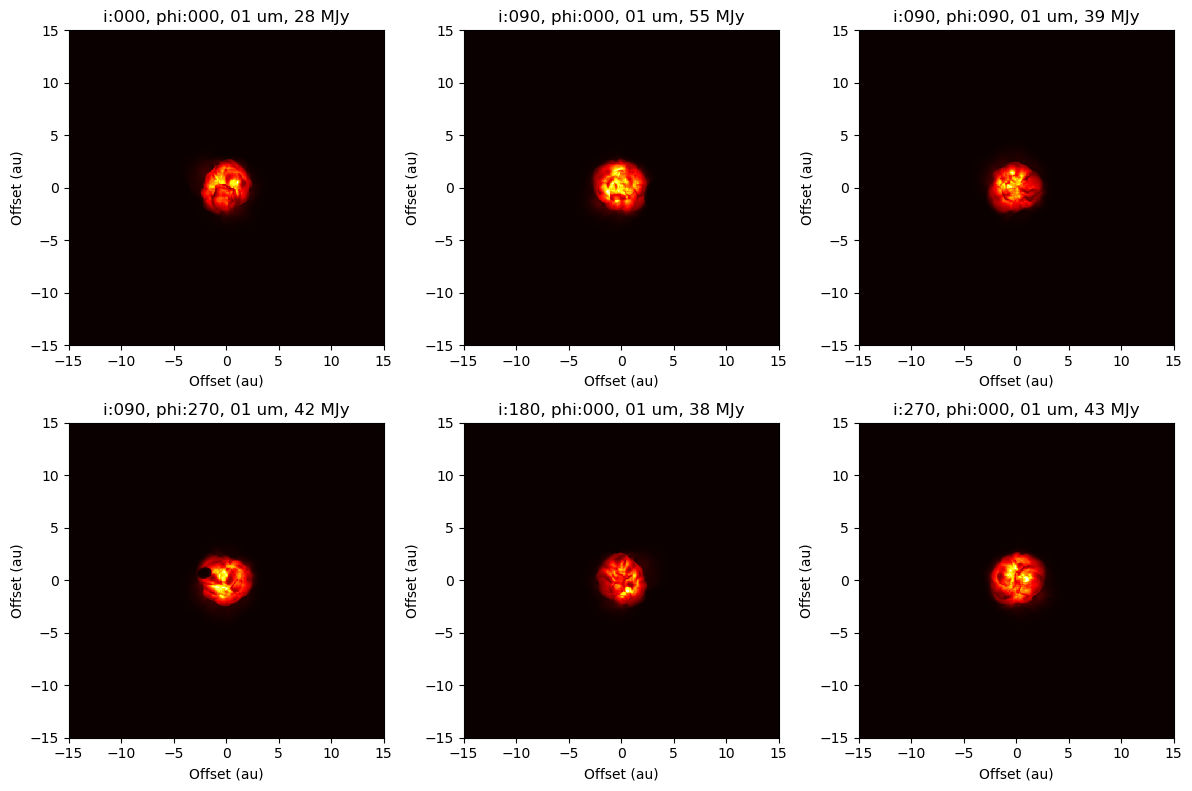

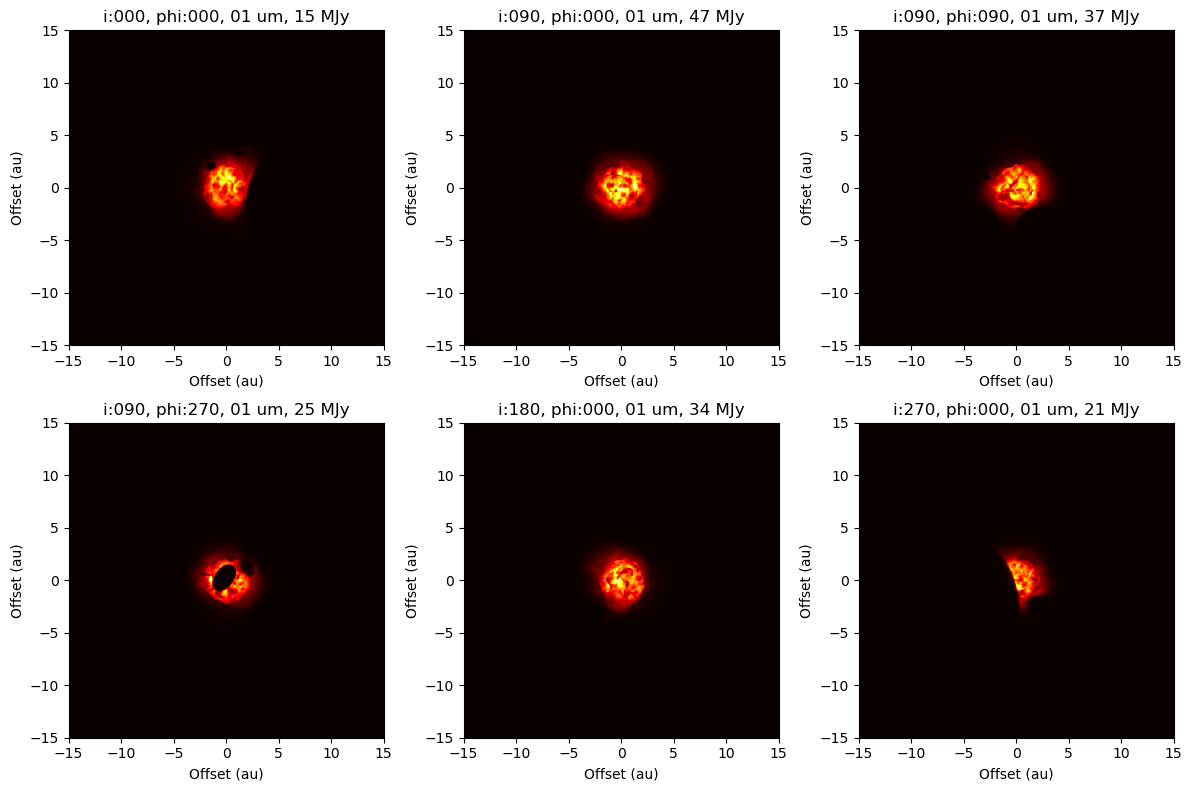

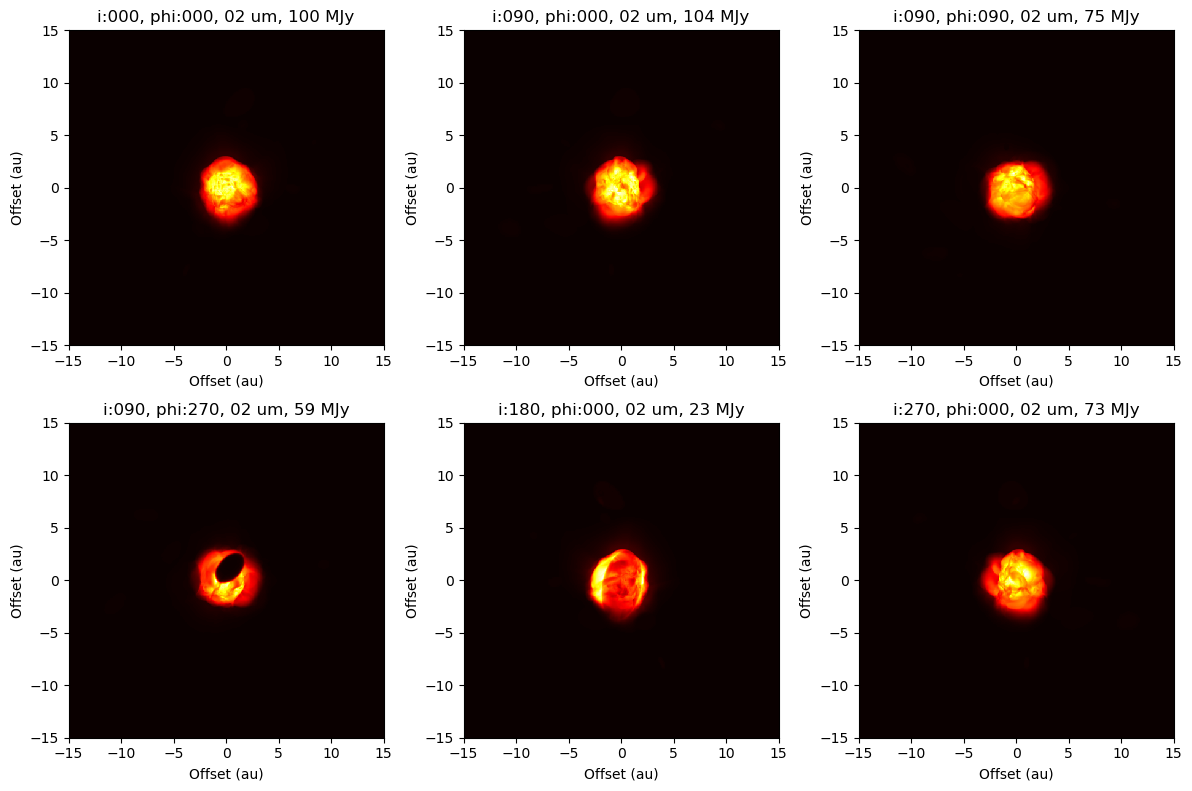

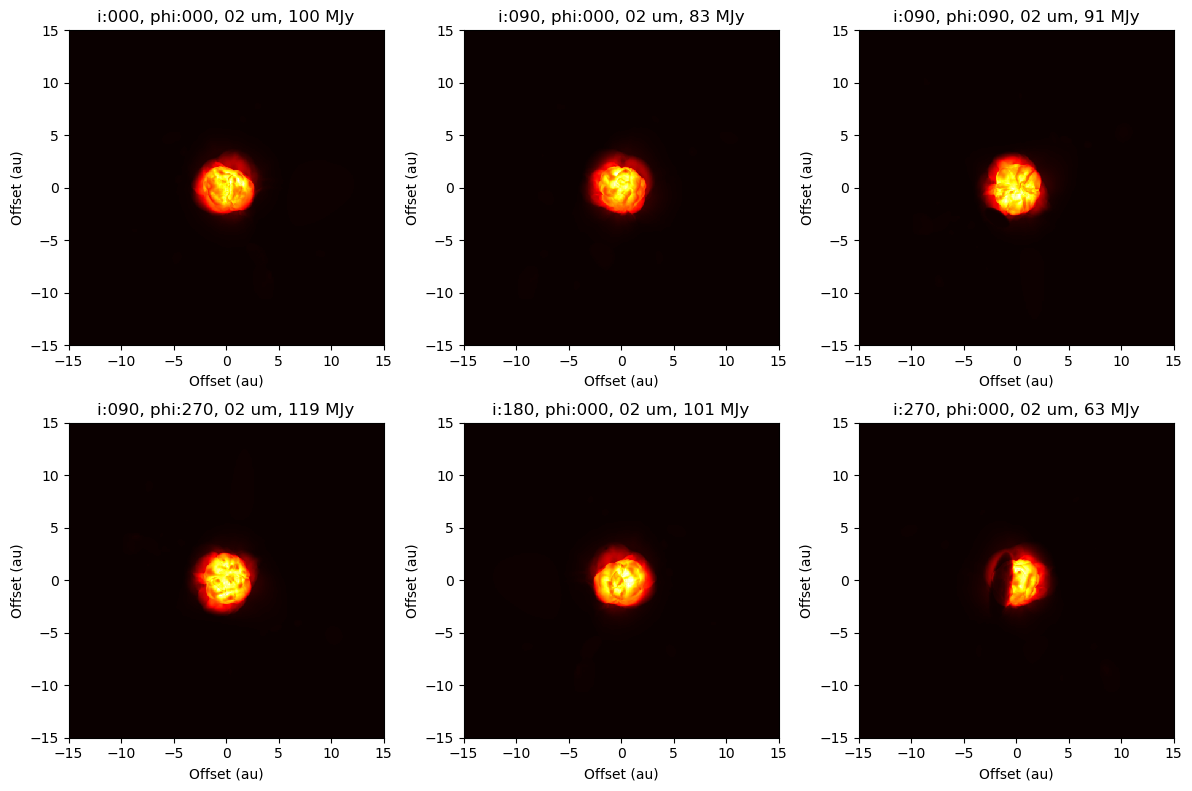

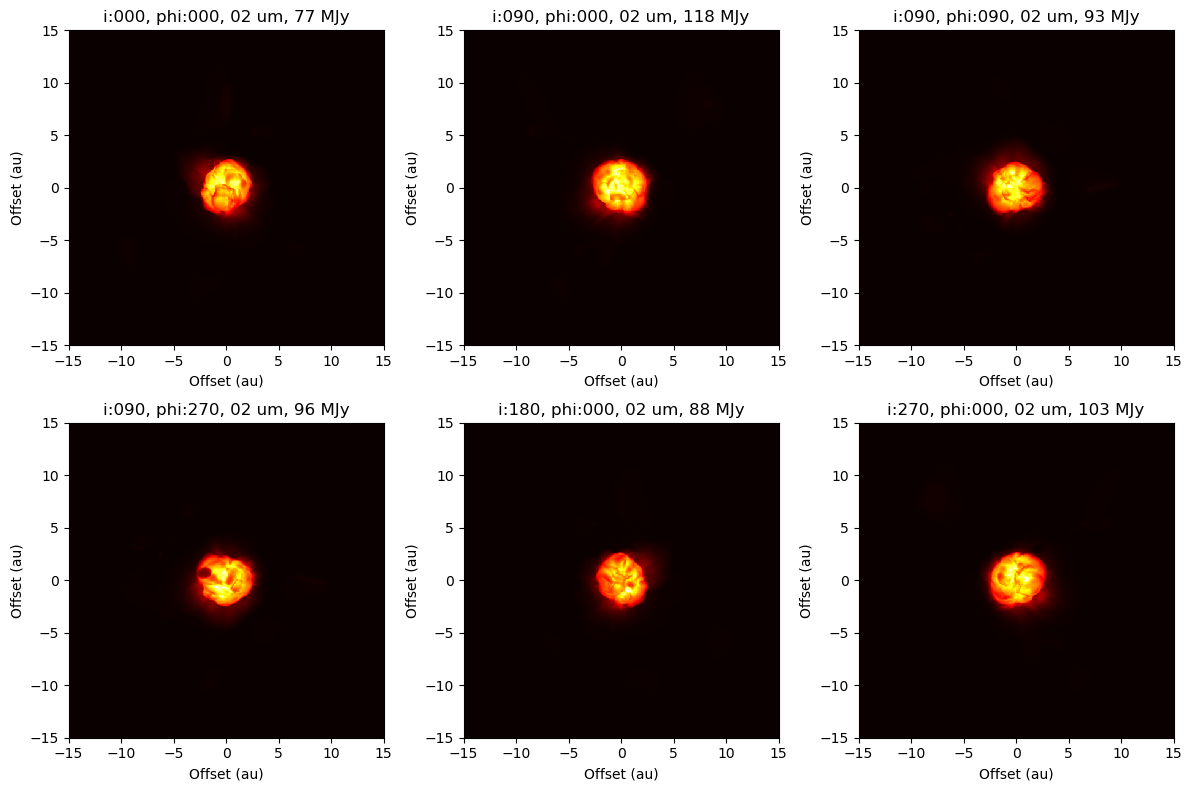

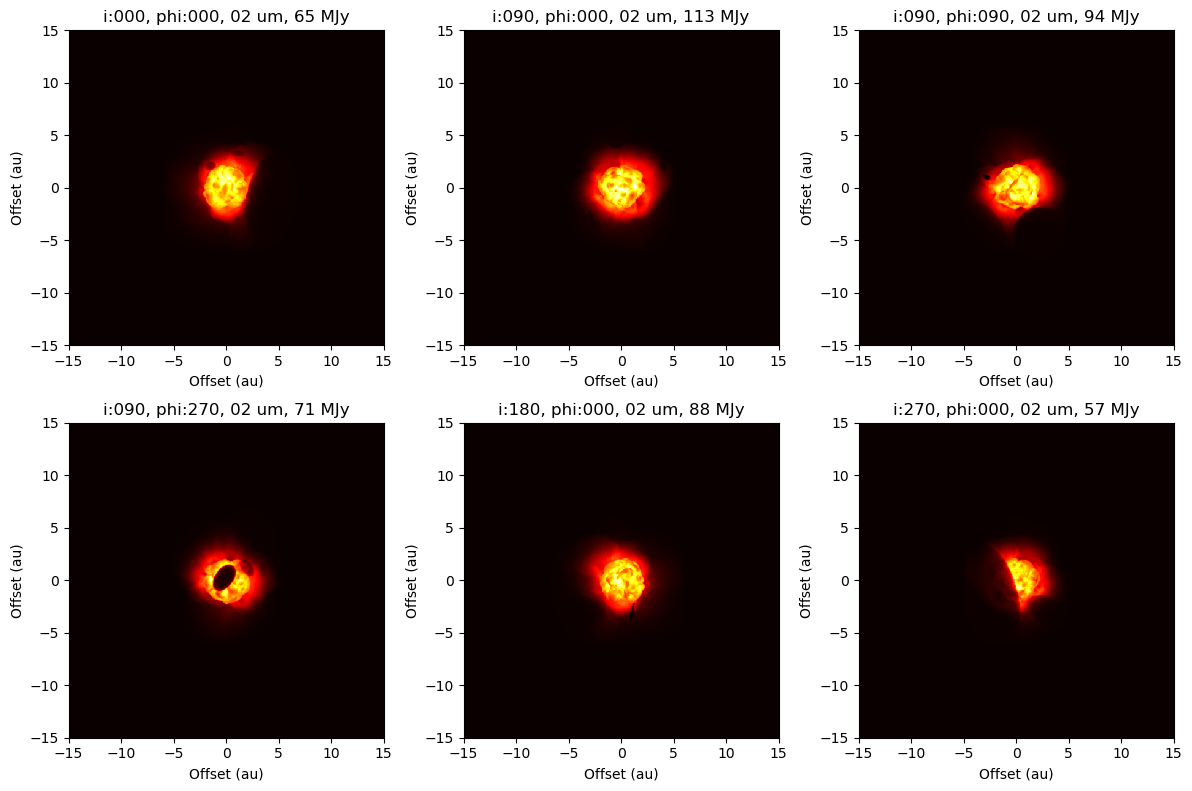

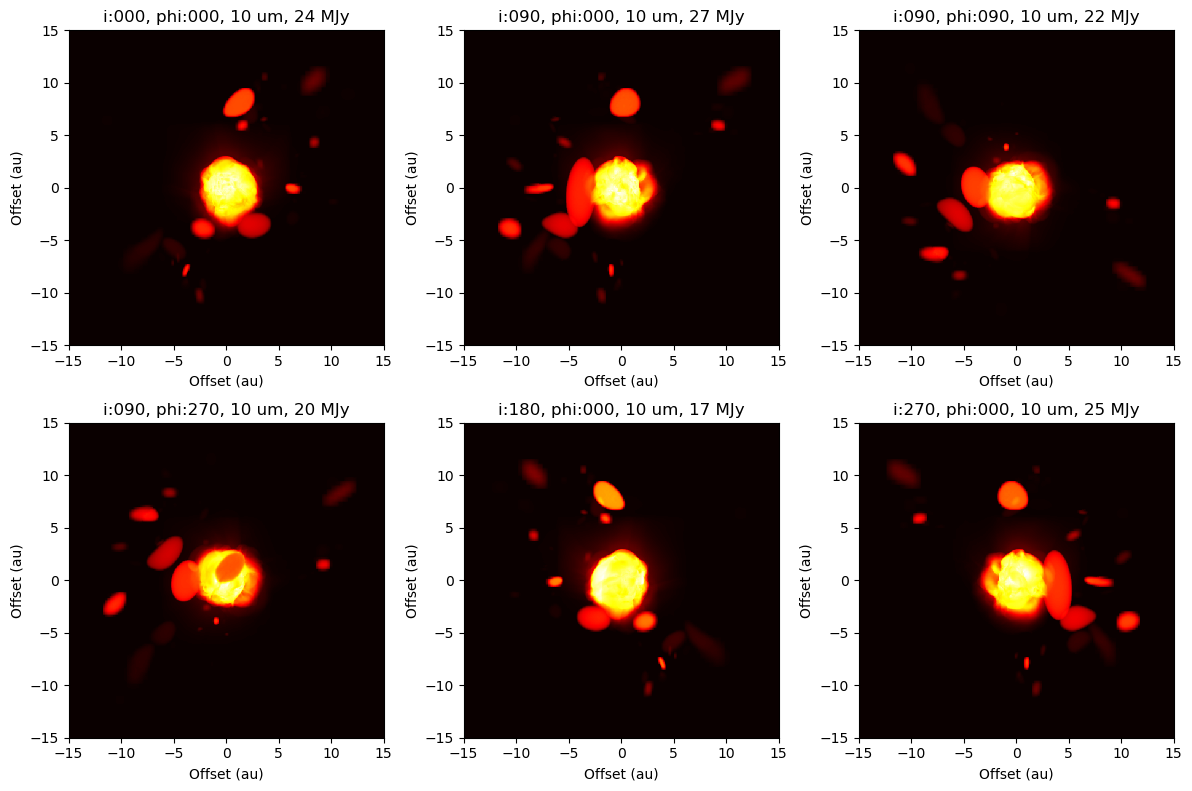

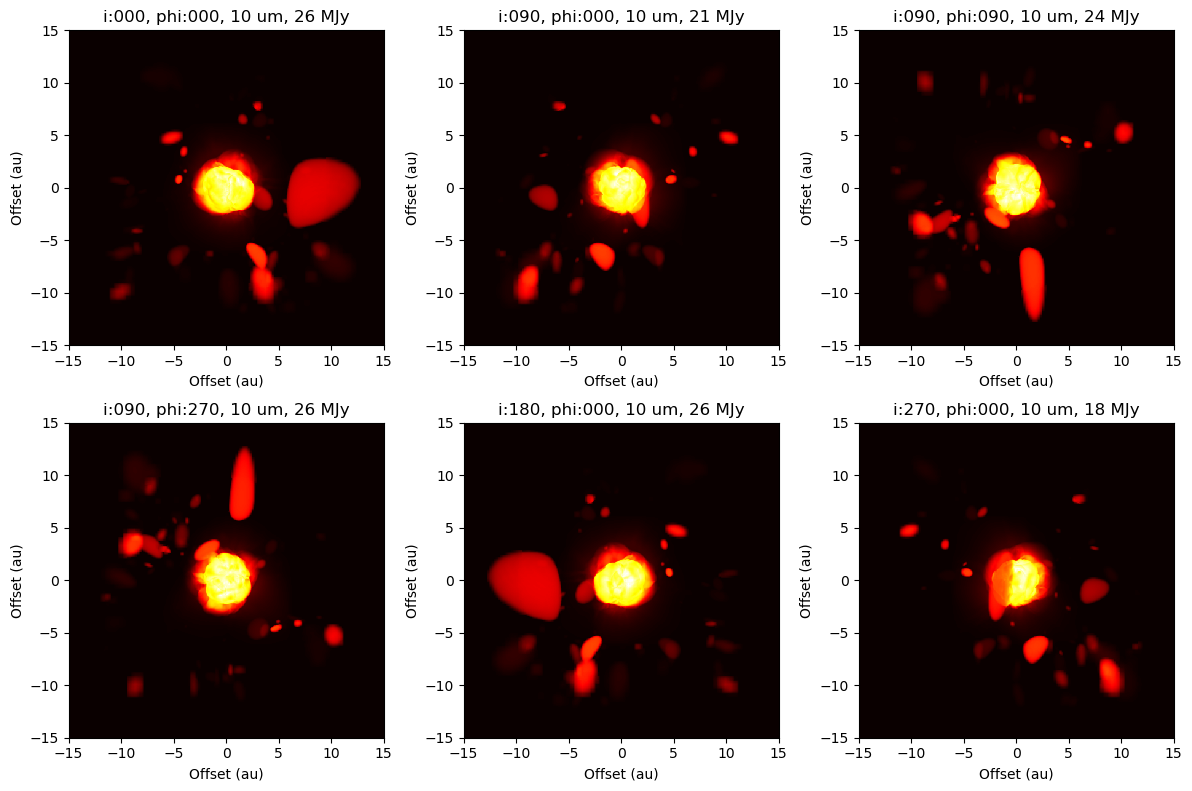

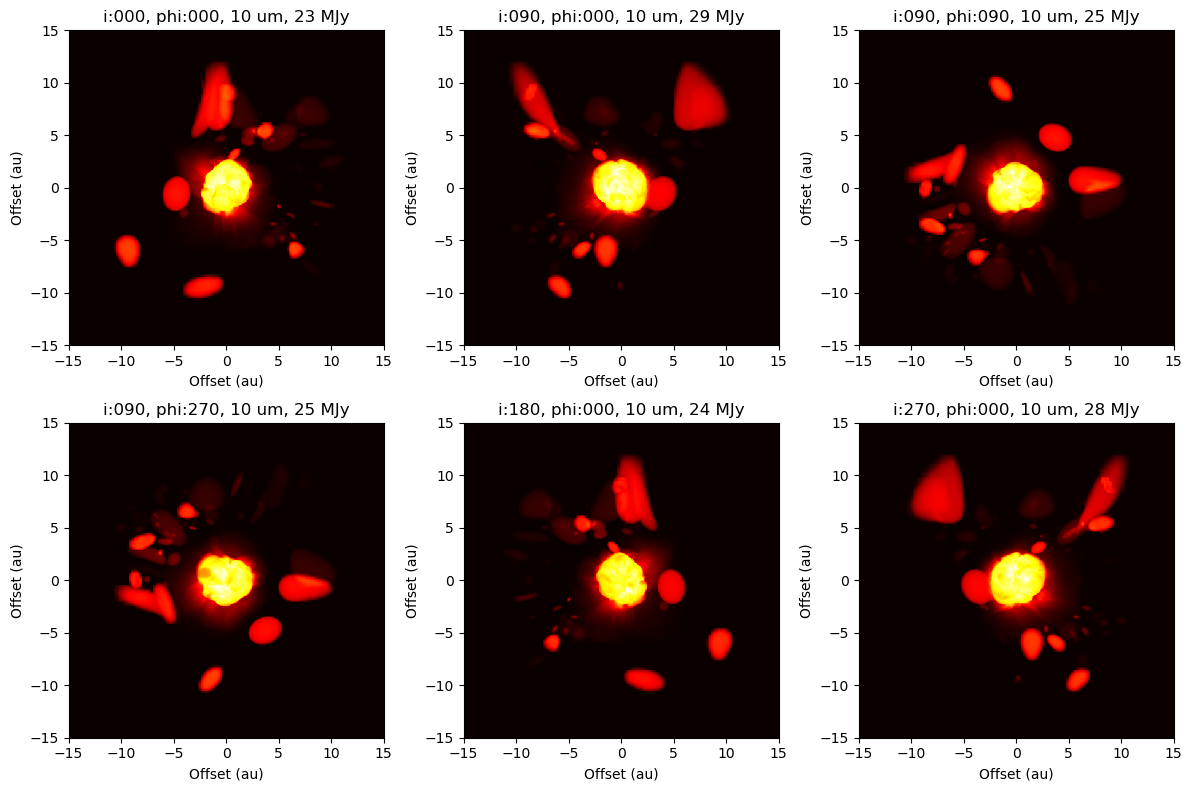

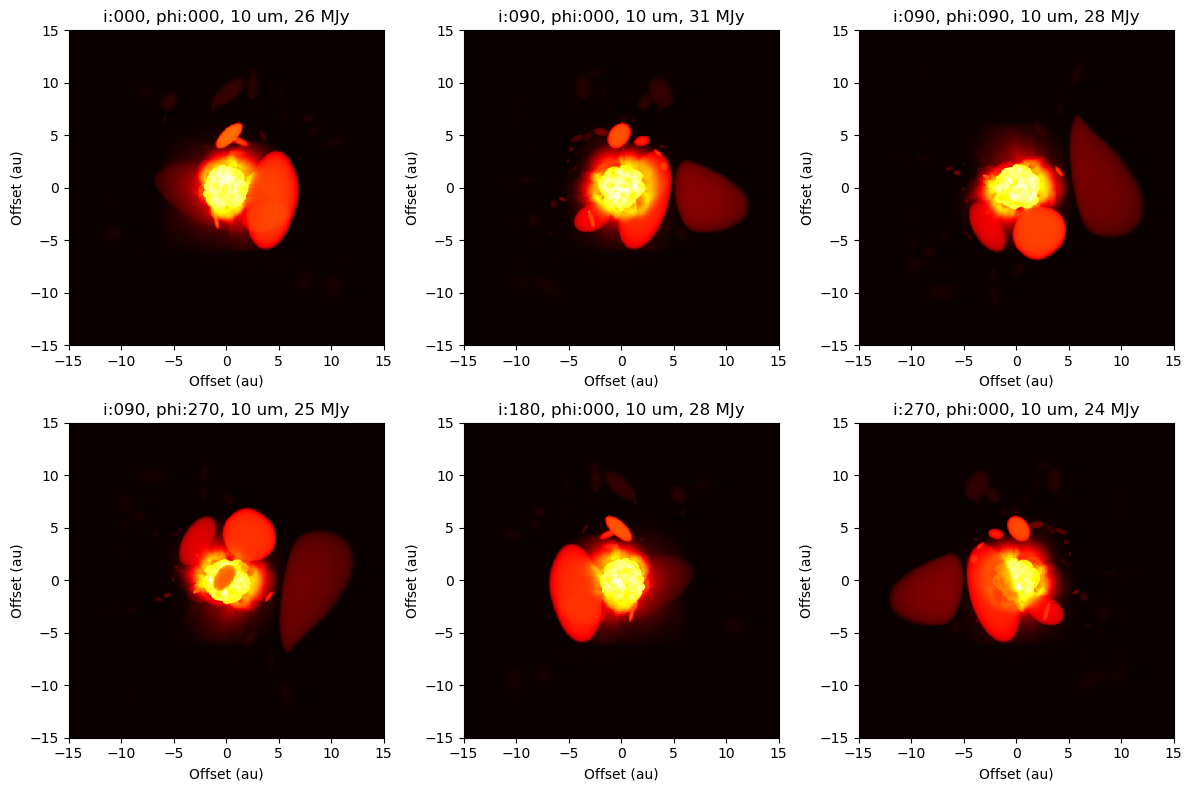

In [6]:
# Plot and save images

# plot time-series images in all directions
# ie 6 subplots in same fig
# capture stops image output
import os
import numpy as np
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
from datetime import date


# Set some path settings
#path = '../r3dresults/st28gm06n052_arief/derivedclumps'
#modelabbreviation = 'st28gm06n052_derivedclumps'
path = '../r3dresults/st28gm06n052_arief/derivedellipsoids'
modelabbreviation = 'st28gm06n052_derivedellipsoids'

snapshot_folders = [
    150,200,250,300
]
# Chose wavelength
wavelengths = [
    '01','02','10'
]
for wavelength in wavelengths:

    # Resulting list of image files
    imagefilenames = [
        f'image_i000_phi000_{wavelength}um.out',
        f'image_i090_phi000_{wavelength}um.out',
        f'image_i090_phi090_{wavelength}um.out',
        f'image_i090_phi270_{wavelength}um.out',
        f'image_i180_phi000_{wavelength}um.out',
        f'image_i270_phi000_{wavelength}um.out'
    ]
    # Create outputfolder
    outputfolder = f'../r3dplots/{str(date.today())}_{modelabbreviation}_image-6direct/'
    if os.path.exists(outputfolder) == False:
        os.system(f'mkdir {outputfolder}')

    # Load all 6 LOSs at a time and save as png's for animation creation
    for phase in snapshot_folders:
        # Create list with image paths
        imagepaths = []
        for imagefilename in imagefilenames:
            imagepaths.append(f'{path}_{phase}_nospikes/{imagefilename}')

        # Create plot objects with image
        fig, ax = a3d.plot_imagesubplots(
            imagelist = imagepaths
        )

        # Save as PNG's
        fig.tight_layout()
        fig.savefig(f'{outputfolder}{phase}_{wavelength}um.png', facecolor='white')

os.system('spd-say moo')





# Adapt original co5bold data

In [1]:
# Ladda ellipsoid-datan från r3d-filerna
# Ladda radial distances
# kolla inom vilka radier ellipsoiderna finns
# begränsa "dust_density_dust.inp" till den radien
# merga med dust_density_opastar och gör en ny dust_density_merged

import analyze_r3d_functions as a3d
import create_r3d_functions as c3d
import numpy as np
import os

AUcm = 1.49598e13 # cm

# Load dust density data of ellipsoids (use inp file before separation into size bins)
Ncells,Nspecies,ellipsoid_dust = a3d.load_dustdensity(
    path = '../r3dresults/st28gm06n052_arief/032_star_ellipsoid_seed1/dust_density_approx.inp',
    numb_specie = 1
)
# Extract filled cells in ellipsoid-data
filled_cells = np.where(ellipsoid_dust > 0)[0]

# Load radial distances
griddistances = a3d.load_griddistances(
    gridpath = '../r3dresults/st28gm06n052_arief/grid_distances.csv',
    amrpath = '../r3dresults/st28gm06n052_arief/amr_grid.inp'
)[:,0]

# Extract highest radial distance of the filled_cells (in cm)
maxdistance = np.max(griddistances[filled_cells])
print(f' Max distance to dust filled cell is {maxdistance/AUcm} AU') 

# Extract all nr3d outside this distance
indexzero = np.where(griddistances > maxdistance)[0]

# Create array to fill with new co5bold-densities
Nspecies = 10
c5ddensity_limited = np.zeros(Ncells*Nspecies)

# Load and write new co5bold-density file where all density(griddistances[nr3d] > maxdistance) = 0
for nspecie in range(Nspecies):
    print(f'Limiting dust grain bin {nspecie+1}')
    # Load co5bold-densities
    Ncells,Nspecies,c5ddensity = a3d.load_dustdensity(
        path = '../r3dresults/st28gm06n052_arief/032_stardust_original/dust_density_dust.inp',
        numb_specie = nspecie+1
    )

    # set all cells outside maxdistance to zero
    c5ddensity[indexzero] = 0

    # Save new limited dust density array/list
    c5ddensity_limited[nspecie*Ncells:(nspecie+1)*Ncells] = c5ddensity

# Save new limited dust density file
with open('../dust_density_dust_limited.inp','w') as fdensity:
    # Write header
    # 1
    # nleafs
    # number dust species
    fdensity.write(f'1\n{int(Ncells)}\n{int(Nspecies)}\n')

    for density in c5ddensity_limited:
        fdensity.write(f'{density}\n')

os.system('mv ../dust_density_dust_limited.inp ../r3dresults/st28gm06n052_arief/032_stardust_original/')

# Merge dust_density_dust_limited.inp with dust_density_opastar.inp
c3d.merge_dustdensities(
    workpath = '../r3dresults/st28gm06n052_arief/032_stardust_original/',
    filenames = [
        'dust_density_opastar.inp',
        'dust_density_dust_limited.inp'
    ]
)



 Max distance to dust filled cell is 10.242383573433022 AU


mv: cannot move '../dust_density_dust_limited.inp' to 'r3dresults/st28gm06n052_arief/032_stardust_original/': No such file or directory


256

# Compare SEDs and images

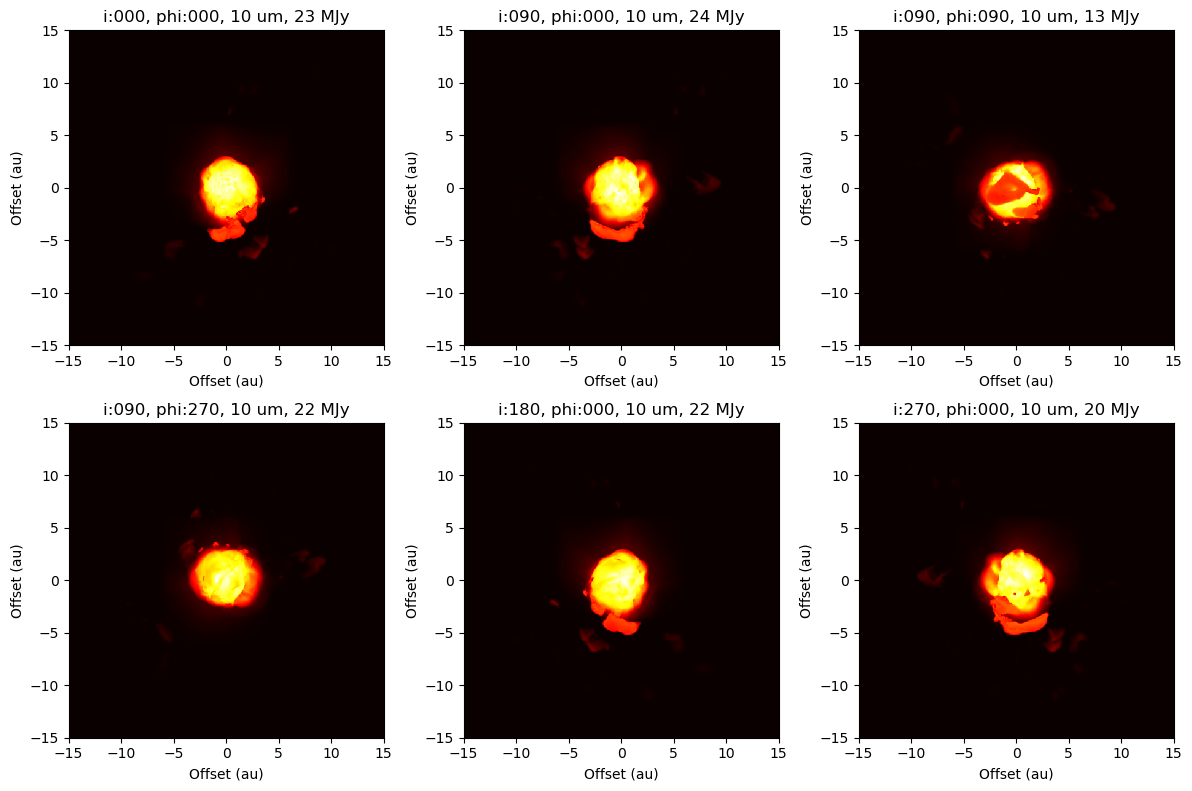

In [1]:
# Plot image files in one fig
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d


# Create plot objects with image
fig, ax = a3d.plot_imagesubplots(
    imagelist = [
        '../arief_data/st28gm06n052_derivedclumps/150/image_i000_phi000_10um.out',
        '../arief_data/st28gm06n052_derivedclumps/150/image_i090_phi000_10um.out',
        '../arief_data/st28gm06n052_derivedclumps/150/image_i090_phi090_10um.out',
        '../arief_data/st28gm06n052_derivedclumps/150/image_i090_phi270_10um.out',
        '../arief_data/st28gm06n052_derivedclumps/150/image_i180_phi000_10um.out',
        '../arief_data/st28gm06n052_derivedclumps/150/image_i270_phi000_10um.out',
    ]
)

# Save as PNG's
fig.tight_layout()
#fig.savefig(f'{outputfolder}{phase}_{wavelength}um.png', facecolor='white')




Running: a3d.compare_images()
A3D compare images:
    resid_zerolim_image_i090_phi090_10um_minus_image_i090_phi090_10um.out
    resid_abs_image_i090_phi090_10um_minus_image_i090_phi090_10um.out
DONE



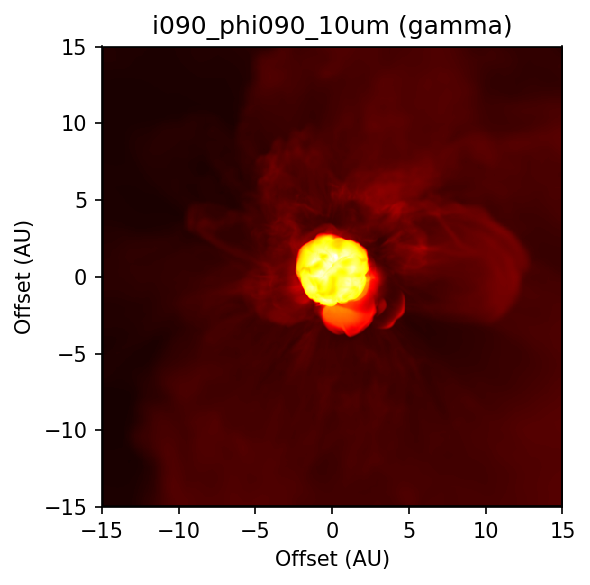

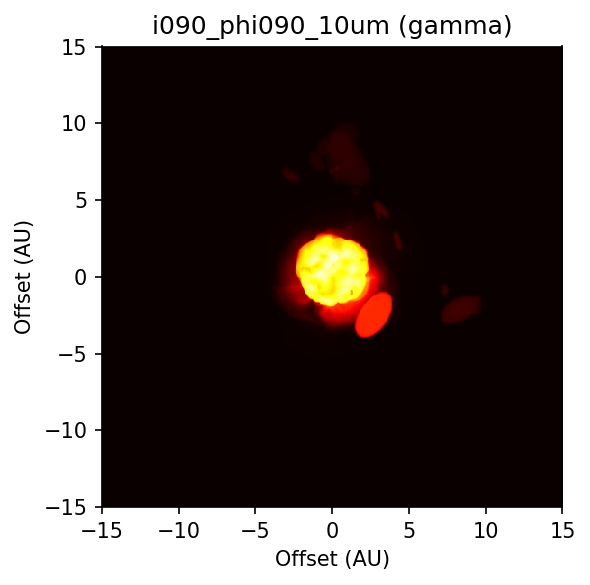

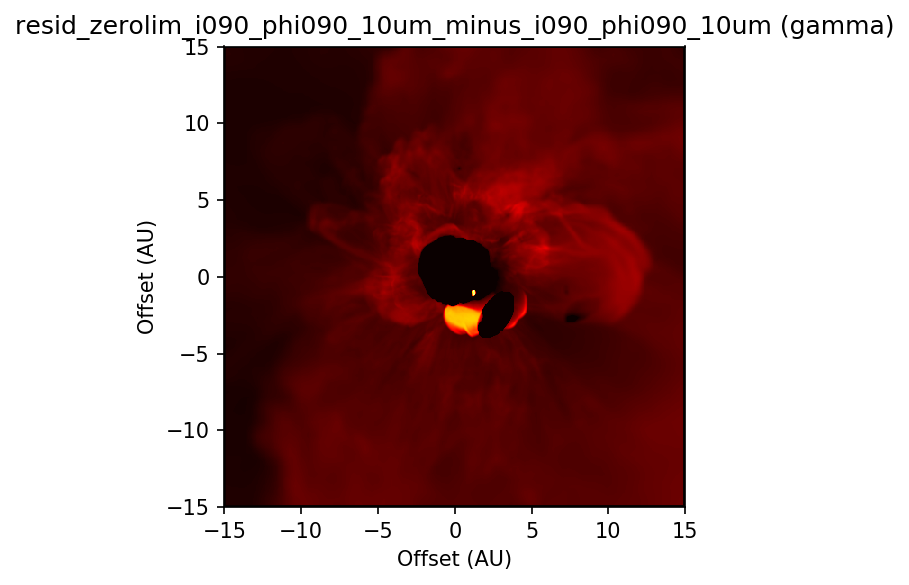

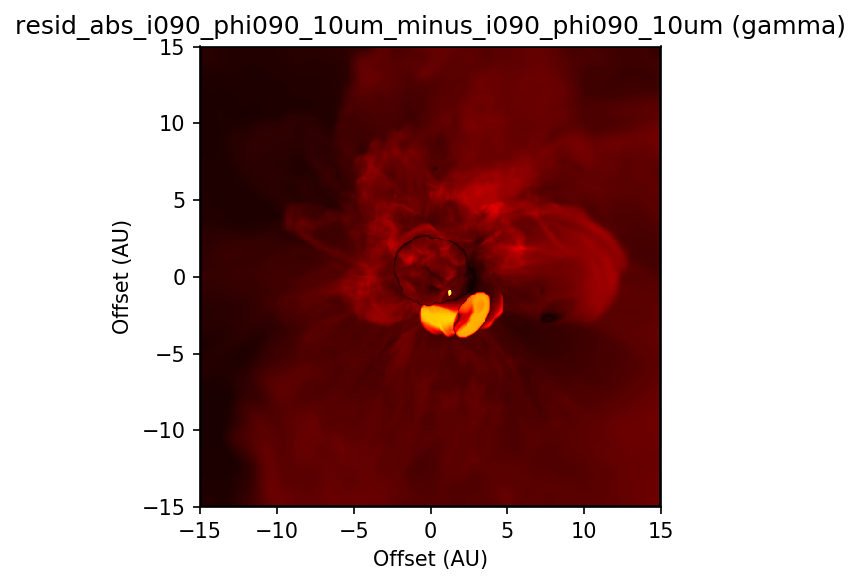

In [14]:
# Create and plot comparison-figures of images with original dust and ellipsoidal dust
import analyze_r3d_functions as a3d
import os

image = 'image_i090_phi090_10um.out'


a3d.compare_images(
    imagepaths = [
        f'../r3dresults/st28gm06n052_arief/032_stardust_nospikes/{image}',
        f'../r3dresults/st28gm06n052_arief/032_starellipsoid_nospikes/{image}'
    ]
)

# Test to plot
a3d.plot_images(
    path='../r3dresults/st28gm06n052_arief/032_stardust_nospikes',
    images=[image]
)
a3d.plot_images(
    path='../r3dresults/st28gm06n052_arief/032_starellipsoid_nospikes/',
    images=[image]
)


filelist = os.listdir(path='../')

for imagename in filelist:
    if imagename[-4:] == '.out':
        a3d.plot_images(images=[imagename])




Running: a3d.compare_seds
logged pearsonchi:
  0.9323883598876975


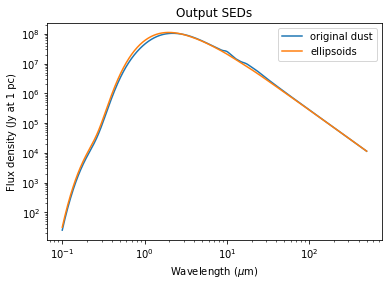

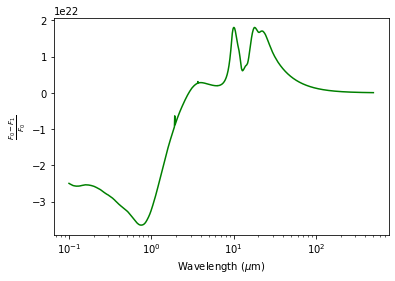

In [10]:
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt


sed = 'spectrum_i270_phi000.out'

pearsonchi = a3d.compare_seds(
    sedpaths=[
        f'../r3dresults/st28gm06n052_arief/032_stardust_nospikes/{sed}',
        f'../r3dresults/st28gm06n052_arief/032_starellipsoid_nospikes/{sed}'
    ]
)
print(f'logged pearsonchi:\n  {pearsonchi}')

# To check, plot all
a3d.plot_sedsmany(
    pathlist=[
        f'../r3dresults/st28gm06n052_arief/032_stardust_nospikes/{sed}',
        f'../r3dresults/st28gm06n052_arief/032_starellipsoid_nospikes/{sed}'
    ],
    legendlist=['original dust','ellipsoids'],
)
# Plot comparison manually
wavelengths, sedcompare = a3d.load_spectrum(
    path = f'../{sed[:-4]}_wrt_{sed[:-4]}.out'
)
sedcompare = np.array(sedcompare)*1e-23
plt.figure('compare')
plt.plot(wavelengths,sedcompare,'g')
plt.xscale('log')
plt.xlabel(r'Wavelength ($\mu$m)');
plt.ylabel(r'$\frac{F_0 - F_1}{F_0}$');


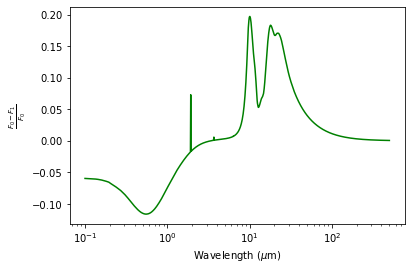

In [1]:
# Plot comparison manually
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt
import numpy as np

sed = 'spectrum_i090_phi090_wrt_spectrum_i090_phi090.out'
wavelengths, sedcompare = a3d.load_spectrum(
    path = f'../r3dresults/st28gm06n052_arief/032_stardust_starellipsoid_compare/{sed}'
)
# Remove translation to Jy since this is a ratio from the beginning
sedcompare = np.array(sedcompare)*1e-23
plt.figure('compare')
plt.plot(wavelengths,sedcompare,'g')
plt.xscale('log')
plt.xlabel(r'Wavelength ($\mu$m)');
plt.ylabel(r'$\frac{F_0 - F_1}{F_0}$');
